In [79]:
!pip install --upgrade scikit-learn


In [80]:
pip install pmdarima


In [81]:
!pip install numpy

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error ,mean_absolute_error
from math import  sqrt
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
import statistics as st
from scipy.stats import mode, skew, kurtosis
import seaborn as sns
import random
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense, SimpleRNN
from keras.layers import LSTM
from keras.layers import Dropout


import pandas as pd
import joblib
import matplotlib.pyplot as plt
import math

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

from keras.models import Sequential
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import SimpleRNN, Embedding
from tensorflow.keras.preprocessing import sequence
from keras.layers import Dense, LSTM, RNN, GRU, Dropout, Activation
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import skew, kurtosis

from torch import nn
from torch.utils.data import DataLoader, Dataset
from datetime import datetime, timedelta
from pmdarima import auto_arima

import warnings
warnings.filterwarnings("ignore")

In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from tqdm import tqdm_notebook
from itertools import product
from typing import Union

from IPython.display import display
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import seaborn as sns
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

RANDOM_SEED = np.random.seed(0)

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error ,mean_absolute_error
from math import  sqrt
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
import statistics as st
from scipy.stats import mode, skew, kurtosis
import seaborn as sns
import random
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense, SimpleRNN
from keras.layers import LSTM
from keras.layers import Dropout


import pandas as pd
import joblib
import matplotlib.pyplot as plt
import math

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

from keras.models import Sequential
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import SimpleRNN, Embedding
from tensorflow.keras.preprocessing import sequence
from keras.layers import Dense, LSTM, RNN, GRU, Dropout, Activation
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import skew, kurtosis

from torch import nn
from torch.utils.data import DataLoader, Dataset
from datetime import datetime, timedelta
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings("ignore")

In [85]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from tqdm import tqdm_notebook
from itertools import product
from typing import Union

from IPython.display import display
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import seaborn as sns
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

RANDOM_SEED = np.random.seed(0)

In [86]:
eth_df = pd.read_csv("/content/Ethereum Historical Data.csv")
eth_df

,Date,Price,Open,High,Low,Vol.,Change %
0,06/01/2024,"3,815.95","3,762.63","3,832.35","3,753.32",143.81K,1.42%
1,05/31/2024,"3,762.66","3,747.89","3,844.96","3,724.57",294.56K,0.40%
2,05/30/2024,"3,747.55","3,767.22","3,824.94","3,703.74",293.81K,-0.58%
3,05/29/2024,"3,769.57","3,845.56","3,886.44","3,745.72",353.25K,-1.98%
4,05/28/2024,"3,845.56","3,894.33","3,929.21","3,775.08",436.24K,-1.25%
...,...,...,...,...,...,...,...
1915,03/05/2019,136.82,125.97,141.11,125.44,16.74M,8.61%
1916,03/04/2019,125.97,131.02,131.57,123.25,14.11M,-3.85%
1917,03/03/2019,131.01,132.77,168.42,129.05,10.64M,-1.32%
1918,03/02/2019,132.76,135.72,136.36,130.74,11.29M,-2.18%


###Data processing

In [87]:
eth_df['Date'] = pd.to_datetime(eth_df['Date'])
eth_df.reset_index(drop=True)
eth_df.set_index('Date', inplace=True)
eth_df.sort_index(ascending=True, inplace=True)

In [88]:
# Hàm để chuyển đổi giá trị có 'K', 'M', hoặc 'B' thành số thực.
def convert_volume(value):
    if 'K' in value:
        return float(value.replace('K', '')) * 1e3
    elif 'M' in value:
        return float(value.replace('M', '')) * 1e6
    elif 'B' in value:
        return float(value.replace('B', '')) * 1e9
    else:
        return float(value)

# Áp dụng hàm cho mỗi giá trị trong cột 'Vol.'.
eth_df['Vol.'] = eth_df['Vol.'].apply(convert_volume)

In [89]:
# Hàm để chuyển đổi giá trị có dấu % thành số thực.
def convert_percent_to_float(value):
    return float(value.replace('%', '')) / 100

# Giả sử etr_df là DataFrame của bạn với cột 'Percentage' cần được chuyển đổi.
# etr_df['Percentage'] = ...

# Áp dụng hàm cho mỗi giá trị trong cột 'Percentage'.
eth_df['Change %'] = eth_df['Change %'].apply(convert_percent_to_float)


In [90]:
eth_df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-03-01,135.72,135.47,138.06,128.46,9730000.0,0.0018
2019-03-02,132.76,135.72,136.36,130.74,11290000.0,-0.0218
2019-03-03,131.01,132.77,168.42,129.05,10640000.0,-0.0132
2019-03-04,125.97,131.02,131.57,123.25,14110000.0,-0.0385
2019-03-05,136.82,125.97,141.11,125.44,16740000.0,0.0861
...,...,...,...,...,...,...
2024-05-28,"3,845.56","3,894.33","3,929.21","3,775.08",436240.0,-0.0125
2024-05-29,"3,769.57","3,845.56","3,886.44","3,745.72",353250.0,-0.0198
2024-05-30,"3,747.55","3,767.22","3,824.94","3,703.74",293810.0,-0.0058


In [91]:
eth_df['Price'] = eth_df['Price'].str.replace(',', '').astype(float)
eth_df['Open'] = eth_df['Open'].str.replace(',', '').astype(float)
eth_df['High'] =eth_df['High'].str.replace(',', '').astype(float)
eth_df['Low'] = eth_df['Low'].str.replace(',', '').astype(float)
eth_df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-03-01,135.72,135.47,138.06,128.46,9730000.0,0.0018
2019-03-02,132.76,135.72,136.36,130.74,11290000.0,-0.0218
2019-03-03,131.01,132.77,168.42,129.05,10640000.0,-0.0132
2019-03-04,125.97,131.02,131.57,123.25,14110000.0,-0.0385
2019-03-05,136.82,125.97,141.11,125.44,16740000.0,0.0861
...,...,...,...,...,...,...
2024-05-28,3845.56,3894.33,3929.21,3775.08,436240.0,-0.0125
2024-05-29,3769.57,3845.56,3886.44,3745.72,353250.0,-0.0198
2024-05-30,3747.55,3767.22,3824.94,3703.74,293810.0,-0.0058


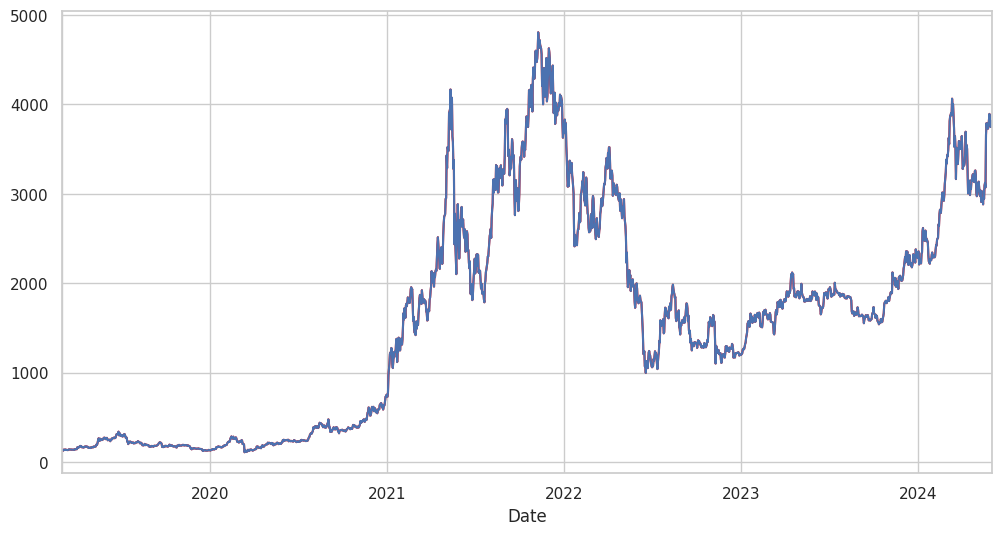

In [92]:
eth_df['Price'].plot(figsize=(12,6),color='red')

plt.plot(eth_df['Price'])

In [93]:
eth_df['Price']

Date
2019-03-01     135.72
2019-03-02     132.76
2019-03-03     131.01
2019-03-04     125.97
2019-03-05     136.82
               ...   
2024-05-28    3845.56
2024-05-29    3769.57
2024-05-30    3747.55
2024-05-31    3762.66
2024-06-01    3815.95
Name: Price, Length: 1920, dtype: float64

###Split data 6:4



In [278]:
window_size = 10
feature_dim = 5

train_size = 0.6
test_size = 0.4

# model params
lstm_neurons = 20
rnn_neurons = 20
epochs = 100
batch_size = 4
loss = 'mae'
dropout = 0.25
optimizer = 'adam'

In [279]:
train_index = int(len(eth_df)*train_size)
train_index

1152

In [280]:
eth_df_train = eth_df.iloc[:train_index]
eth_df_test  = eth_df[train_index:]

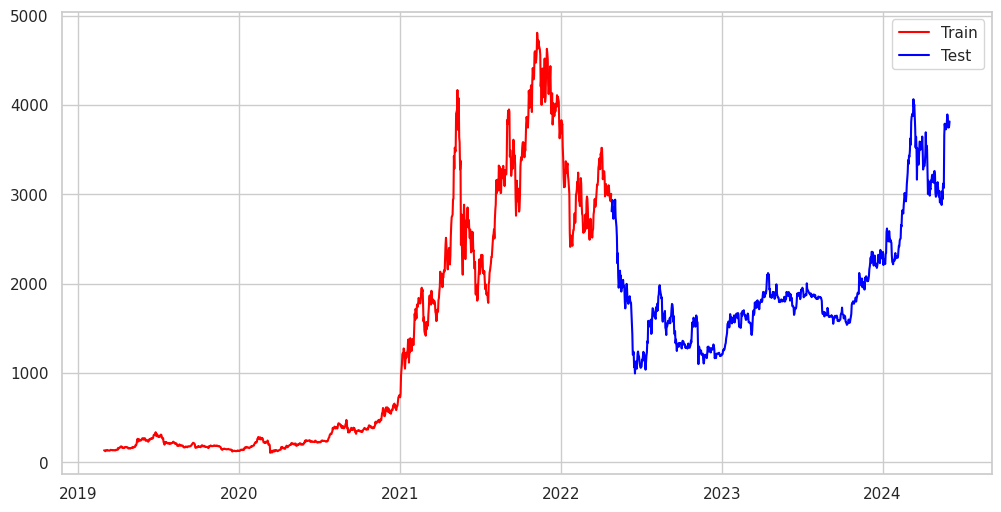

In [281]:
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(eth_df_train).index.to_list(), pd.DataFrame(eth_df_train['Price']), color='red', label='Train')
plt.plot(pd.DataFrame(eth_df_test).index.to_list(),pd.DataFrame(eth_df_test['Price']),color='blue' ,label ='Test')
plt.legend()
plt.show()

In [282]:
eth_df['Price_diff'] = eth_df['Price'].diff(periods=7)
eth_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1920 entries, 2019-03-01 to 2024-06-01
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        1920 non-null   float64
 1   Open         1920 non-null   float64
 2   High         1920 non-null   float64
 3   Low          1920 non-null   float64
 4   Vol.         1920 non-null   float64
 5   Change %     1920 non-null   float64
 6   Price_diff   1913 non-null   float64
 7   month_index  1920 non-null   int32  
dtypes: float64(7), int32(1)
memory usage: 127.5 KB


In [283]:
eth_df

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-01,135.72,135.47,138.06,128.46,9730000.0,0.0018,NaN,3
2019-03-02,132.76,135.72,136.36,130.74,11290000.0,-0.0218,NaN,3
2019-03-03,131.01,132.77,168.42,129.05,10640000.0,-0.0132,NaN,3
2019-03-04,125.97,131.02,131.57,123.25,14110000.0,-0.0385,NaN,3
2019-03-05,136.82,125.97,141.11,125.44,16740000.0,0.0861,NaN,3
...,...,...,...,...,...,...,...,...
2024-05-28,3845.56,3894.33,3929.21,3775.08,436240.0,-0.0125,55.10,5
2024-05-29,3769.57,3845.56,3886.44,3745.72,353250.0,-0.0198,30.49,5
2024-05-30,3747.55,3767.22,3824.94,3703.74,293810.0,-0.0058,-38.10,5


In [284]:
eth_df['Price_diff'].fillna(method='backfill', inplace=True)

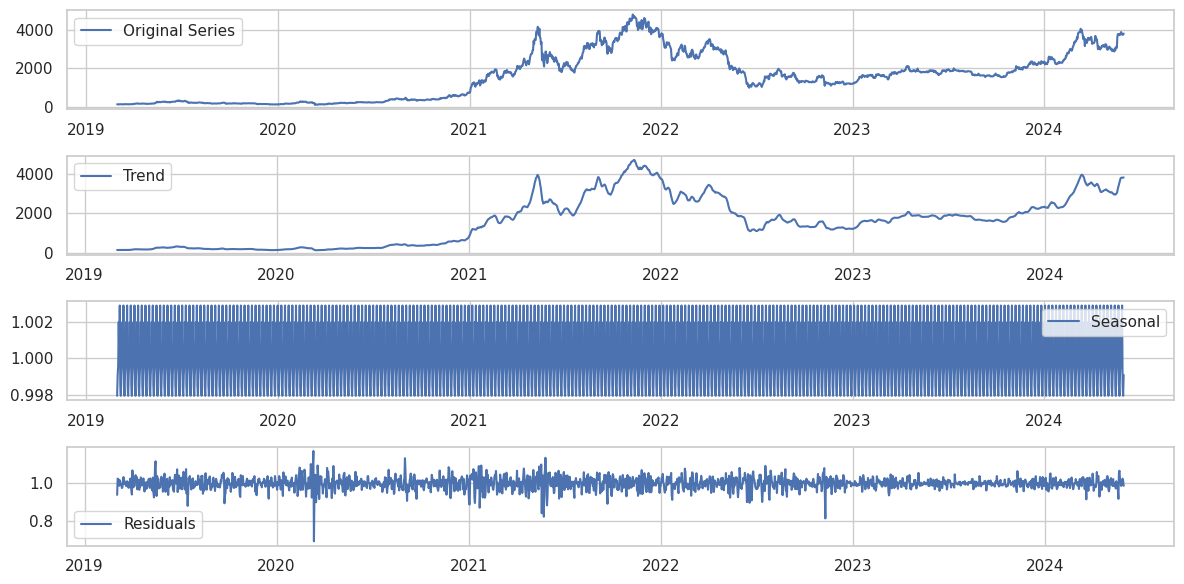

In [285]:
result = seasonal_decompose(eth_df['Price'], model='multiplicative', period=7)
trend = result.trend.dropna()
seasonal = result.seasonal.dropna()
residual = result.resid.dropna()

# Plot the decomposed components
plt.figure(figsize=(12,6))

plt.subplot(4, 1, 1)
plt.plot(eth_df['Price'], label='Original Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()
# for fun i guess

In [286]:
eth_df['month_index'] = eth_df.index.month
eth_df

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-01,135.72,135.47,138.06,128.46,9730000.0,0.0018,-1.87,3
2019-03-02,132.76,135.72,136.36,130.74,11290000.0,-0.0218,-1.87,3
2019-03-03,131.01,132.77,168.42,129.05,10640000.0,-0.0132,-1.87,3
2019-03-04,125.97,131.02,131.57,123.25,14110000.0,-0.0385,-1.87,3
2019-03-05,136.82,125.97,141.11,125.44,16740000.0,0.0861,-1.87,3
...,...,...,...,...,...,...,...,...
2024-05-28,3845.56,3894.33,3929.21,3775.08,436240.0,-0.0125,55.10,5
2024-05-29,3769.57,3845.56,3886.44,3745.72,353250.0,-0.0198,30.49,5
2024-05-30,3747.55,3767.22,3824.94,3703.74,293810.0,-0.0058,-38.10,5


In [287]:
df_monthly = eth_df.resample('M').mean()
df_monthly

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-31,136.375161,136.172581,140.065484,133.572258,1.167710e+07,0.001752,0.784516,3.0
2019-04-30,165.005667,164.344333,169.412667,159.621333,1.186200e+07,0.005223,4.618000,4.0
2019-05-31,219.652581,216.219677,227.308065,209.318387,1.344806e+07,0.017661,23.737419,5.0
2019-06-30,274.209333,273.389000,282.697333,264.795667,8.730000e+06,0.003943,11.260333,6.0
2019-07-31,247.334516,249.753226,256.461290,238.759032,9.371613e+06,-0.008245,-22.530323,7.0
...,...,...,...,...,...,...,...,...
2024-02-29,2746.431724,2710.027241,2782.710690,2672.922759,4.425869e+05,0.013400,214.253793,2.0
2024-03-31,3626.963871,3616.920968,3722.042258,3501.579032,5.989626e+05,0.003642,88.199032,3.0
2024-04-30,3246.043333,3267.134667,3340.207000,3150.657667,4.535570e+05,-0.005713,-90.864667,4.0


<Axes: xlabel='Date'>

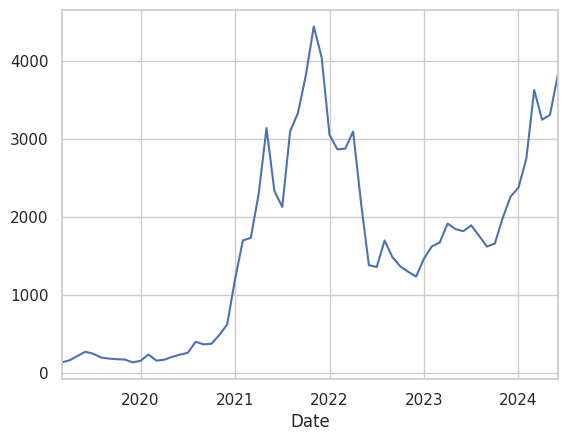

In [288]:
df_monthly['Price'].plot()

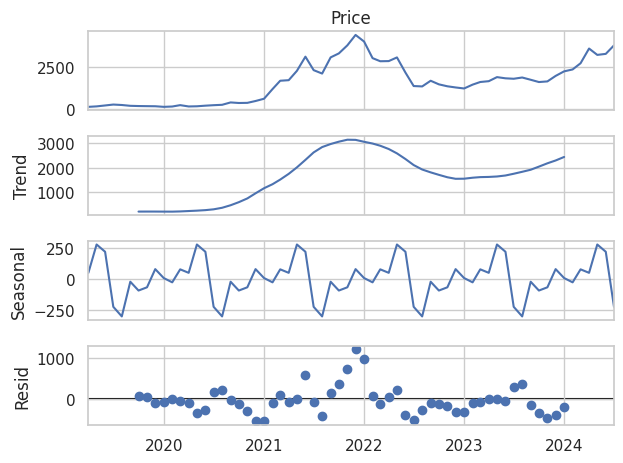

In [289]:
decompose = seasonal_decompose(df_monthly['Price'])
decompose.plot()

plt.show()

In [28]:
#import pmdarima as pm
#model = pm.auto_arima(df_monthly['Price'], trace = True,start_P=0, seasonal=True,exogenous=eth_df['month_index'],
					#	d=None, D=1,m=12,
				#		error_action='ignore',
					#	suppress_warnings=True,
				#		stepwise=True)

In [290]:
train = eth_df_train['Price']
test = eth_df_test['Price']
start = len(train)
end = len(train) +len(test) -1

In [30]:
import pmdarima as pm
model = pm.auto_arima(train, trace = True,start_P=0, seasonal=True,exogenous=eth_df['month_index'],
						d=None, D=1,m=7,max_p=3, max_d=2, max_q=3,
						error_action='ignore',
						suppress_warnings=True,
						stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,1,1)[7] intercept   : AIC=inf, Time=11.06 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=15747.778, Time=0.09 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=14086.642, Time=2.08 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=15021.159, Time=1.44 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=15752.161, Time=0.08 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=14370.291, Time=0.12 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=13924.966, Time=6.31 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=6.82 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=3.45 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=15733.694, Time=1.61 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=13922.942, Time=7.82 sec
 ARIMA(2,0,0)(1,1,0)[7] intercept   : AIC=14084.417, Time=2.63 sec
 ARIMA(2,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=11.17 sec
 ARIMA(2,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=3.10 sec
 ARIMA(3,0,0)(2,1,0)[7] intercept   : AIC=13920

In [291]:

model_sarimax = sm.tsa.statespace.SARIMAX(train,
                                          order = (3,0,3),
                                          seasonal_order = (2,1,0,7))
result = model_sarimax.fit()

In [292]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Price   No. Observations:                 1152
Model:             SARIMAX(3, 0, 3)x(2, 1, [], 7)   Log Likelihood               -6924.743
Date:                            Wed, 19 Jun 2024   AIC                          13867.487
Time:                                    08:58:04   BIC                          13912.875
Sample:                                03-01-2019   HQIC                         13884.624
                                     - 04-25-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.0614      0.021     97.410      0.000       2.020       2.103
ar.L2         -1.8788      0.036    -52.056      0.000      -1.950      -1.808
ar.L3          0.7622      0.020     38.955      0.000       0.724       0.801
ma.L1         -1.2242      0.025    -48.900      0.000      -1.273      -1.175
ma.L2          0.9617      0.031     31.461      0.000       0.902       1.022
ma.L3          0.0086      0.022      0.383      0.702      -0.035       0.052
ar.S.L7       -0.6261      0.014    -46.016      0.000      -0.653      -0.599
ar.S.L14      -0.3390      0.015    -22.457      0.000      -0.369      -0.309
sigma2      9937.6960    170.303     58.353      0.000    9603.909    1.03e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              6026.06
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):             240.17   Skew:                            -0.74
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [293]:
predictions = result.predict(start, end)
predictions

2022-04-26    3010.870457
2022-04-27    2964.186007
2022-04-28    2942.323377
2022-04-29    2944.719668
2022-04-30    2969.774308
                 ...     
2024-05-28    2933.428054
2024-05-29    2927.487104
2024-05-30    2882.437385
2024-05-31    2890.535353
2024-06-01    2902.729549
Freq: D, Name: predicted_mean, Length: 768, dtype: float64

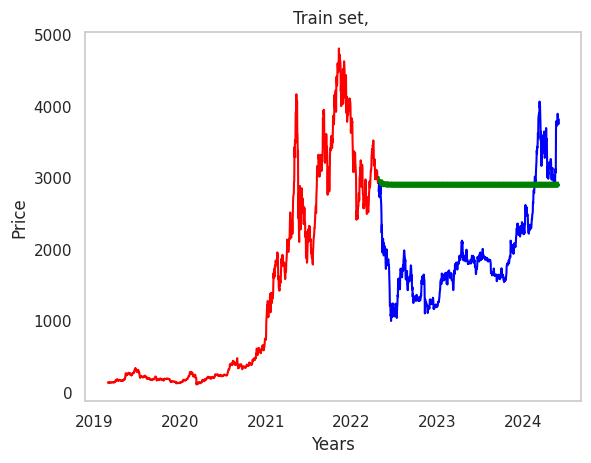

In [294]:
plt.plot(train, color = "red")
plt.plot(test, color = "blue")
plt.plot(predictions, color = "green")

# title and axis captions
plt.title("Train set, ")
plt.ylabel("Price")
plt.xlabel('Years')

# add a grid
plt.grid()

plt.show()

In [295]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np
from sklearn.metrics import mean_squared_error

In [296]:
print('MAPE = ', mean_absolute_percentage_error(test, predictions))
print('MAE = ', mean_absolute_error(test, predictions))
print('RMSE = ', np.sqrt(mean_squared_error(test, predictions)))

MAPE =  0.6622223855903089
MAE =  1066.5854468774949
RMSE =  1153.587296785534


In [297]:
start = len(eth_df)

end = (len(eth_df) - 1) + 30

forecast_30 = result.predict(start, end)

In [222]:
start = len(eth_df)


end = (len(eth_df) - 1) + 60


forecast_60 = result.predict(start, end)

In [298]:
start = len(eth_df)


end = (len(eth_df) - 1) + 90


forecast_90 = result.predict(start, end)

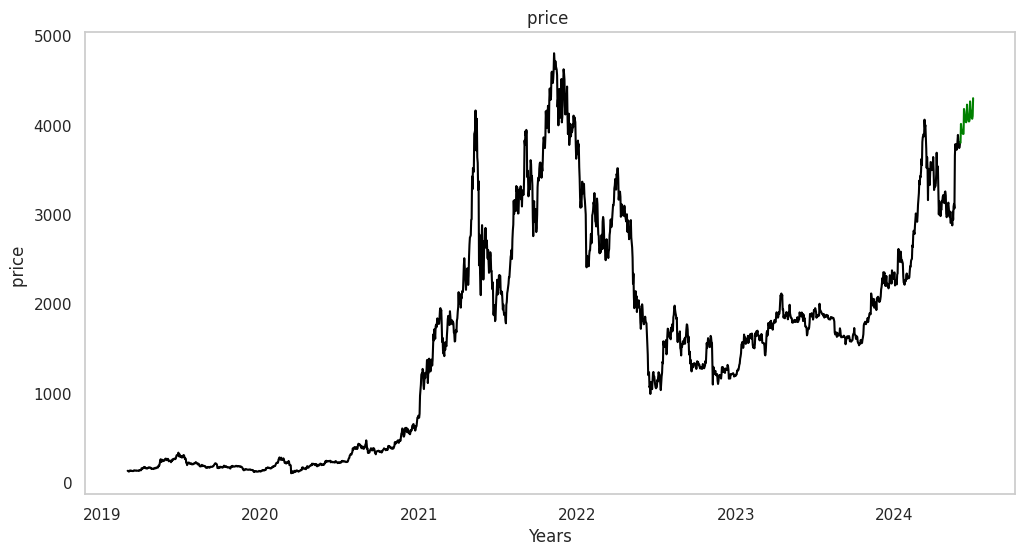

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(eth_df['Price'], color = 'black')
plt.plot(forecast_30, color = 'green')

# title and axis captions
plt.title("price ")
plt.ylabel("price ")
plt.xlabel('Years')

# add a grid
plt.grid()

plt.show()

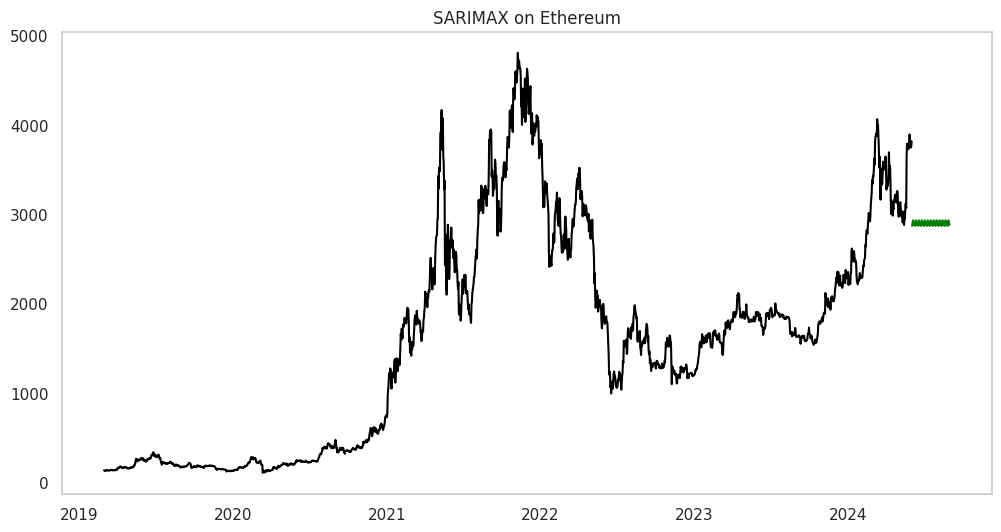

In [299]:
plt.figure(figsize=(12, 6))
plt.plot(eth_df['Price'], color = 'black')
plt.plot(forecast_90, color = 'green')

# title and axis captions
#plt.title("Close price ")
#plt.ylabel("Close price ")
#plt.xlabel('Years')

# add a grid
plt.title("SARIMAX on Ethereum")
plt.grid()

plt.show()

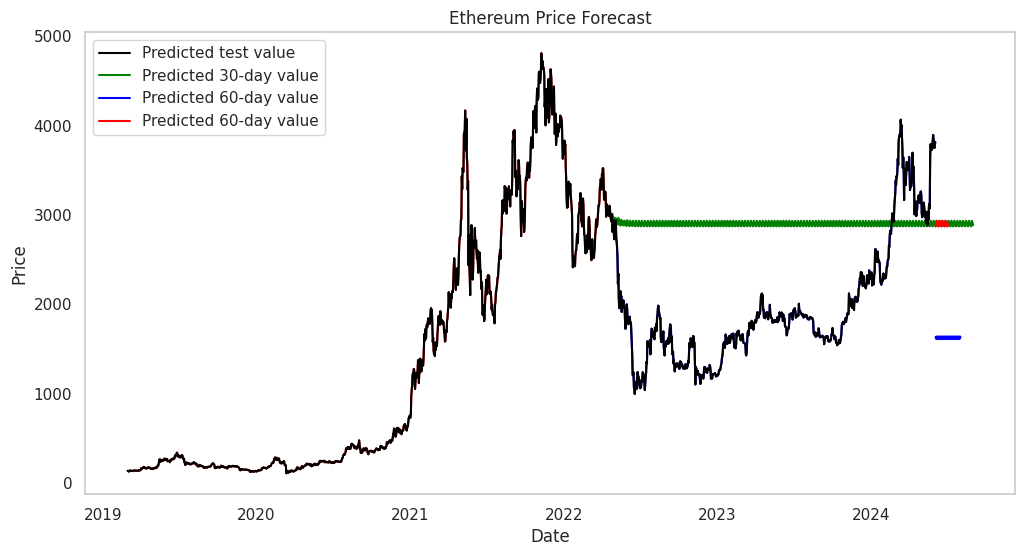

In [300]:
plt.figure(figsize=(12, 6))

plt.plot(train, color = "red")
plt.plot(test, color = "blue")
plt.plot(predictions, color = "green")

# title and axis captions
plt.title("Train set, ")
plt.ylabel("Price")
plt.xlabel('Years')


plt.plot(eth_df['Price'], color = 'black', label='Predicted test value')
plt.plot(forecast_90, color = 'green', label='Predicted 30-day value')
plt.plot(forecast_60, color = 'blue', label='Predicted 60-day value')
plt.plot(forecast_30, color = 'red', label='Predicted 60-day value')

# title and axis captions
plt.title("Ethereum Price Forecast")
plt.ylabel("Price")
plt.xlabel('Date')

# add a legend
plt.legend()

# add a grid
plt.grid()

# display the plot
plt.show()


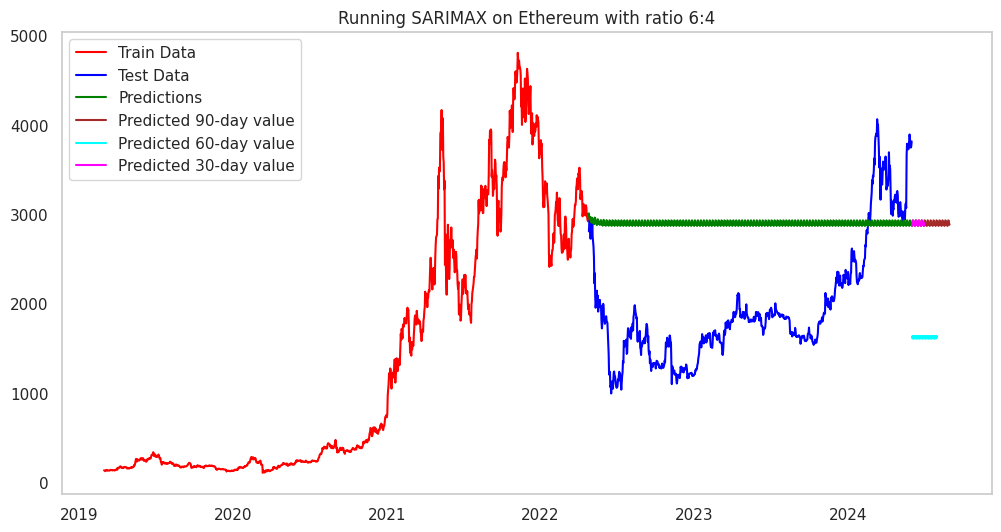

In [301]:
plt.figure(figsize=(12, 6))

# Vẽ dữ liệu train, test và predictions
plt.plot(train, color = "red", label='Train Data')
plt.plot(test, color = "blue", label='Test Data')
plt.plot(predictions, color = "green", label='Predictions')

# Vẽ dữ liệu giá Ethereum và các dự báo
#plt.plot(eth_df['Price'], color = 'black', label='Actual Price')
plt.plot(forecast_90, color = 'brown', label='Predicted 90-day value')
plt.plot(forecast_60, color = 'cyan', label='Predicted 60-day value')
plt.plot(forecast_30, color = 'magenta', label='Predicted 30-day value')

# Thiết lập tiêu đề và nhãn cho trục
plt.title("Running SARIMAX on Ethereum with ratio 6:4")
#plt.ylabel("Price")
#plt.xlabel('Date')

# Thêm chú giải
plt.legend()

# Thêm lưới
plt.grid()

# Hiển thị biểu đồ
plt.show()


###Split data 7:3



In [225]:
window_size = 10
feature_dim = 5

train_size = 0.7
test_size = 0.3

# model params
lstm_neurons = 20
rnn_neurons = 20
epochs = 100
batch_size = 4
loss = 'mae'
dropout = 0.25
optimizer = 'adam'

In [226]:
train_index = int(len(eth_df)*train_size)
train_index

1344

In [227]:
eth_df_train = eth_df.iloc[:train_index]
eth_df_test  = eth_df[train_index:]

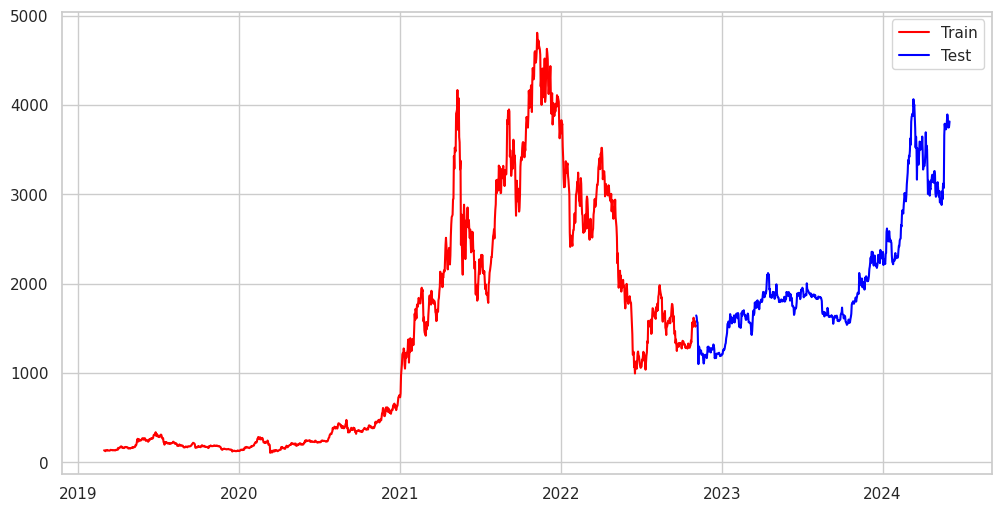

In [228]:
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(eth_df_train).index.to_list(), pd.DataFrame(eth_df_train['Price']), color='red', label='Train')
plt.plot(pd.DataFrame(eth_df_test).index.to_list(),pd.DataFrame(eth_df_test['Price']),color='blue' ,label ='Test')
plt.legend()
plt.show()

In [229]:
eth_df['Price_diff'] = eth_df['Price'].diff(periods=7)
eth_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1920 entries, 2019-03-01 to 2024-06-01
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        1920 non-null   float64
 1   Open         1920 non-null   float64
 2   High         1920 non-null   float64
 3   Low          1920 non-null   float64
 4   Vol.         1920 non-null   float64
 5   Change %     1920 non-null   float64
 6   Price_diff   1913 non-null   float64
 7   month_index  1920 non-null   int32  
dtypes: float64(7), int32(1)
memory usage: 127.5 KB


In [230]:
eth_df

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-01,135.72,135.47,138.06,128.46,9730000.0,0.0018,NaN,3
2019-03-02,132.76,135.72,136.36,130.74,11290000.0,-0.0218,NaN,3
2019-03-03,131.01,132.77,168.42,129.05,10640000.0,-0.0132,NaN,3
2019-03-04,125.97,131.02,131.57,123.25,14110000.0,-0.0385,NaN,3
2019-03-05,136.82,125.97,141.11,125.44,16740000.0,0.0861,NaN,3
...,...,...,...,...,...,...,...,...
2024-05-28,3845.56,3894.33,3929.21,3775.08,436240.0,-0.0125,55.10,5
2024-05-29,3769.57,3845.56,3886.44,3745.72,353250.0,-0.0198,30.49,5
2024-05-30,3747.55,3767.22,3824.94,3703.74,293810.0,-0.0058,-38.10,5


In [231]:
eth_df['Price_diff'].fillna(method='backfill', inplace=True)

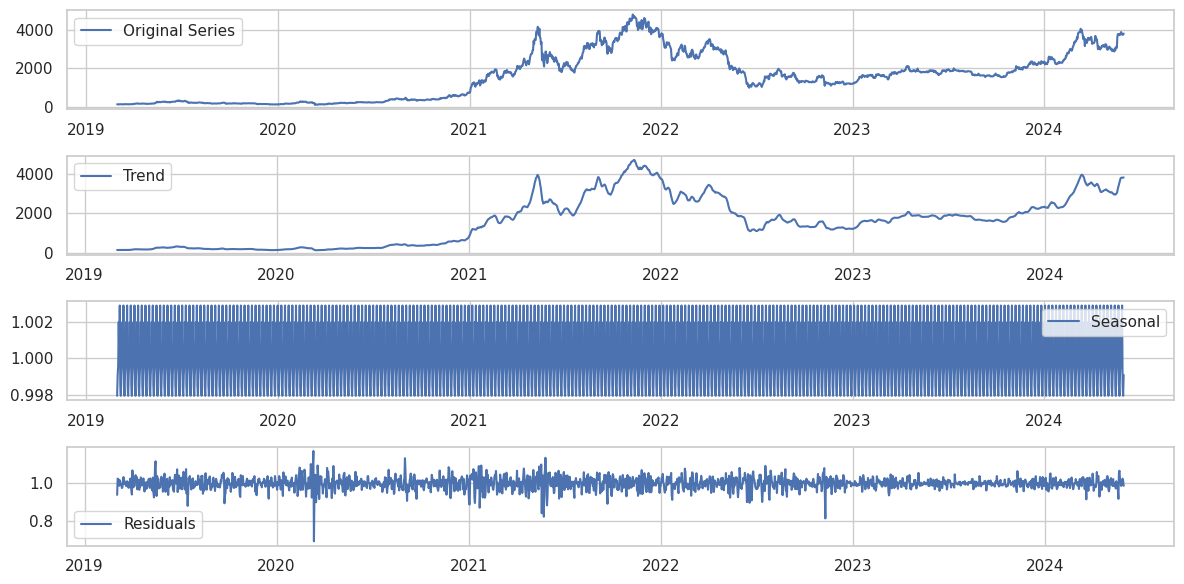

In [232]:
result = seasonal_decompose(eth_df['Price'], model='multiplicative', period=7)
trend = result.trend.dropna()
seasonal = result.seasonal.dropna()
residual = result.resid.dropna()

# Plot the decomposed components
plt.figure(figsize=(12,6))

plt.subplot(4, 1, 1)
plt.plot(eth_df['Price'], label='Original Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()
# for fun i guess

In [233]:
eth_df['month_index'] = eth_df.index.month
eth_df

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-01,135.72,135.47,138.06,128.46,9730000.0,0.0018,-1.87,3
2019-03-02,132.76,135.72,136.36,130.74,11290000.0,-0.0218,-1.87,3
2019-03-03,131.01,132.77,168.42,129.05,10640000.0,-0.0132,-1.87,3
2019-03-04,125.97,131.02,131.57,123.25,14110000.0,-0.0385,-1.87,3
2019-03-05,136.82,125.97,141.11,125.44,16740000.0,0.0861,-1.87,3
...,...,...,...,...,...,...,...,...
2024-05-28,3845.56,3894.33,3929.21,3775.08,436240.0,-0.0125,55.10,5
2024-05-29,3769.57,3845.56,3886.44,3745.72,353250.0,-0.0198,30.49,5
2024-05-30,3747.55,3767.22,3824.94,3703.74,293810.0,-0.0058,-38.10,5


In [234]:
df_monthly = eth_df.resample('M').mean()
df_monthly

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-31,136.375161,136.172581,140.065484,133.572258,1.167710e+07,0.001752,0.784516,3.0
2019-04-30,165.005667,164.344333,169.412667,159.621333,1.186200e+07,0.005223,4.618000,4.0
2019-05-31,219.652581,216.219677,227.308065,209.318387,1.344806e+07,0.017661,23.737419,5.0
2019-06-30,274.209333,273.389000,282.697333,264.795667,8.730000e+06,0.003943,11.260333,6.0
2019-07-31,247.334516,249.753226,256.461290,238.759032,9.371613e+06,-0.008245,-22.530323,7.0
...,...,...,...,...,...,...,...,...
2024-02-29,2746.431724,2710.027241,2782.710690,2672.922759,4.425869e+05,0.013400,214.253793,2.0
2024-03-31,3626.963871,3616.920968,3722.042258,3501.579032,5.989626e+05,0.003642,88.199032,3.0
2024-04-30,3246.043333,3267.134667,3340.207000,3150.657667,4.535570e+05,-0.005713,-90.864667,4.0


<Axes: xlabel='Date'>

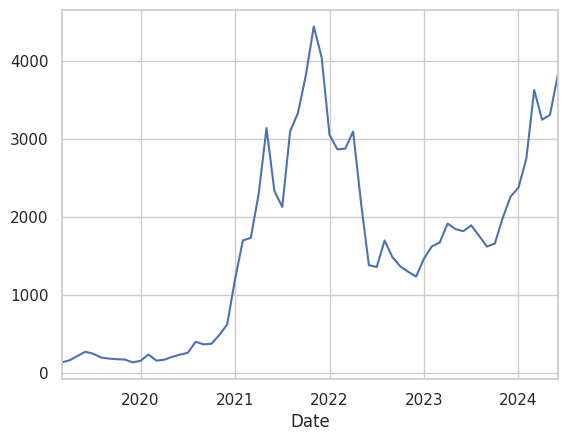

In [235]:
df_monthly['Price'].plot()

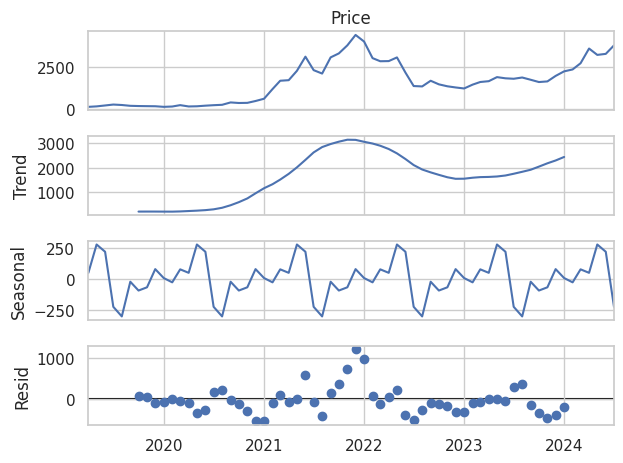

In [236]:
decompose = seasonal_decompose(df_monthly['Price'])
decompose.plot()

plt.show()

In [173]:
#import pmdarima as pm
#model = pm.auto_arima(df_monthly['Price'], trace = True,start_P=0, seasonal=True,exogenous=eth_df['month_index'],
					#	d=None, D=1,m=12,
				#		error_action='ignore',
					#	suppress_warnings=True,
				#		stepwise=True)

In [237]:
train = eth_df_train['Price']
test = eth_df_test['Price']
start = len(train)
end = len(train) +len(test) -1

In [175]:
import pmdarima as pm
model = pm.auto_arima(train, trace = True,start_P=0, seasonal=True,exogenous=eth_df['month_index'],
						d=None, D=1,m=7,max_p=3, max_d=2, max_q=3,
						error_action='ignore',
						suppress_warnings=True,
						stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,1,1)[7] intercept   : AIC=inf, Time=10.67 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=18388.991, Time=0.09 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=16412.058, Time=2.24 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=17529.516, Time=1.69 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=18388.361, Time=0.07 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=16733.806, Time=0.13 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=16223.062, Time=7.89 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=7.15 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=3.35 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=18383.687, Time=1.58 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=16218.891, Time=10.25 sec
 ARIMA(2,0,0)(1,1,0)[7] intercept   : AIC=16407.649, Time=2.81 sec
 ARIMA(2,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=11.95 sec
 ARIMA(2,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=7.03 sec
 ARIMA(3,0,0)(2,1,0)[7] intercept   : AIC=1621

In [238]:

model_sarimax = sm.tsa.statespace.SARIMAX(train,
                                          order = (3,0,0),
                                          seasonal_order = (2,1,0,7))
result = model_sarimax.fit()

In [239]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Price   No. Observations:                 1344
Model:             SARIMAX(3, 0, 0)x(2, 1, 0, 7)   Log Likelihood               -8100.064
Date:                           Wed, 19 Jun 2024   AIC                          16212.128
Time:                                   08:46:59   BIC                          16243.318
Sample:                               03-01-2019   HQIC                         16223.814
                                    - 11-03-2022                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8752      0.017     51.378      0.000       0.842       0.909
ar.L2          0.1305      0.019      6.767      0.000       0.093       0.168
ar.L3         -0.0718      0.013     -5.667      0.000      -0.097      -0.047
ar.S.L7       -0.6587      0.012    -53.875      0.000      -0.683      -0.635
ar.S.L14      -0.3631      0.014    -25.999      0.000      -0.390      -0.336
sigma2      1.067e+04    194.816     54.775      0.000    1.03e+04    1.11e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              4575.79
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):             143.08   Skew:                            -0.64
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [240]:
predictions = result.predict(start, end)
predictions

2022-11-04    1533.416643
2022-11-05    1545.509323
2022-11-06    1551.386495
2022-11-07    1540.104851
2022-11-08    1560.889524
                 ...     
2024-05-28    1638.726459
2024-05-29    1629.043522
2024-05-30    1608.421287
2024-05-31    1617.153720
2024-06-01    1638.872325
Freq: D, Name: predicted_mean, Length: 576, dtype: float64

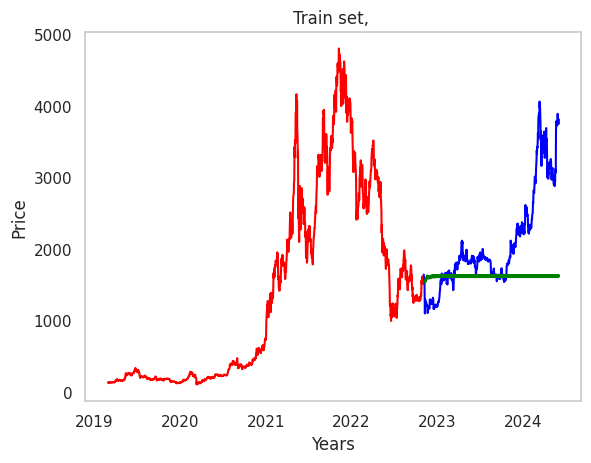

In [241]:
plt.plot(train, color = "red")
plt.plot(test, color = "blue")
plt.plot(predictions, color = "green")

# title and axis captions
plt.title("Train set, ")
plt.ylabel("Price")
plt.xlabel('Years')

# add a grid
plt.grid()

plt.show()

In [242]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np
from sklearn.metrics import mean_squared_error

In [243]:
print('MAPE = ', mean_absolute_percentage_error(test, predictions))
print('MAE = ', mean_absolute_error(test, predictions))
print('RMSE = ', np.sqrt(mean_squared_error(test, predictions)))

MAPE =  0.2208298549455342
MAE =  553.7025911533356
RMSE =  829.2507627971385


In [244]:
start = len(eth_df)

end = (len(eth_df) - 1) + 30

forecast_30 = result.predict(start, end)

In [245]:
start = len(eth_df)


end = (len(eth_df) - 1) + 60


forecast_60 = result.predict(start, end)

In [246]:
start = len(eth_df)


end = (len(eth_df) - 1) + 90


forecast_90 = result.predict(start, end)

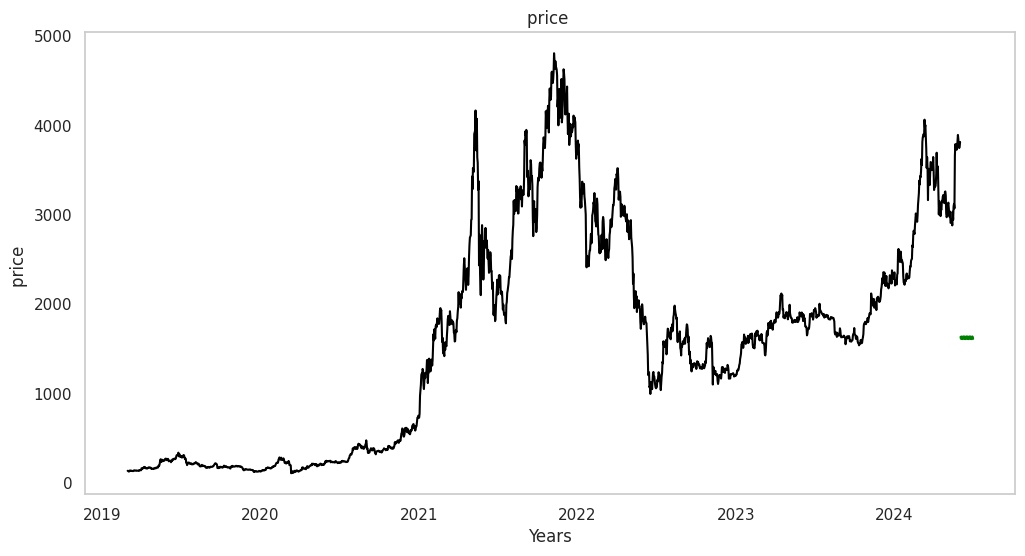

In [247]:
plt.figure(figsize=(12, 6))
plt.plot(eth_df['Price'], color = 'black')
plt.plot(forecast_30, color = 'green')

# title and axis captions
plt.title("price ")
plt.ylabel("price ")
plt.xlabel('Years')

# add a grid
plt.grid()

plt.show()

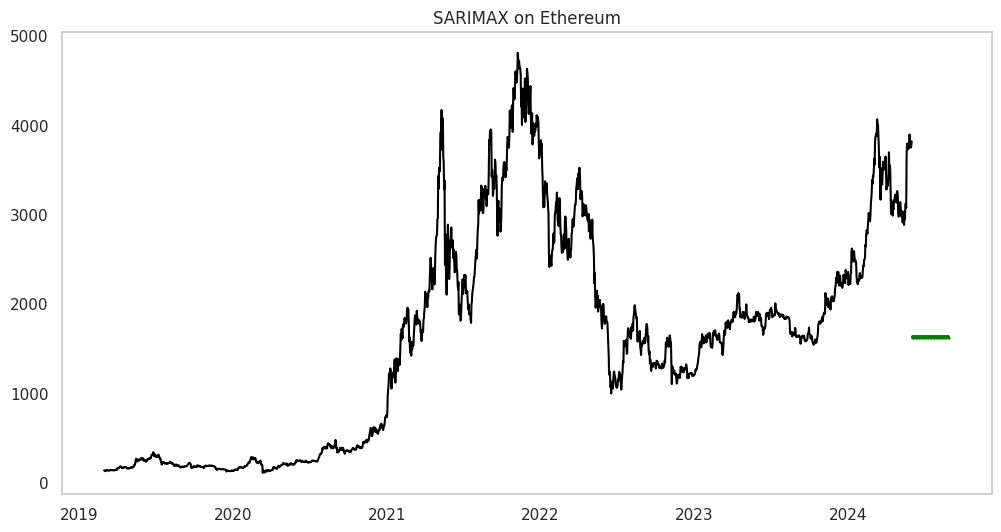

In [248]:
plt.figure(figsize=(12, 6))
plt.plot(eth_df['Price'], color = 'black')
plt.plot(forecast_90, color = 'green')

# title and axis captions
#plt.title("Close price ")
#plt.ylabel("Close price ")
#plt.xlabel('Years')

# add a grid
plt.title("SARIMAX on Ethereum")
plt.grid()

plt.show()

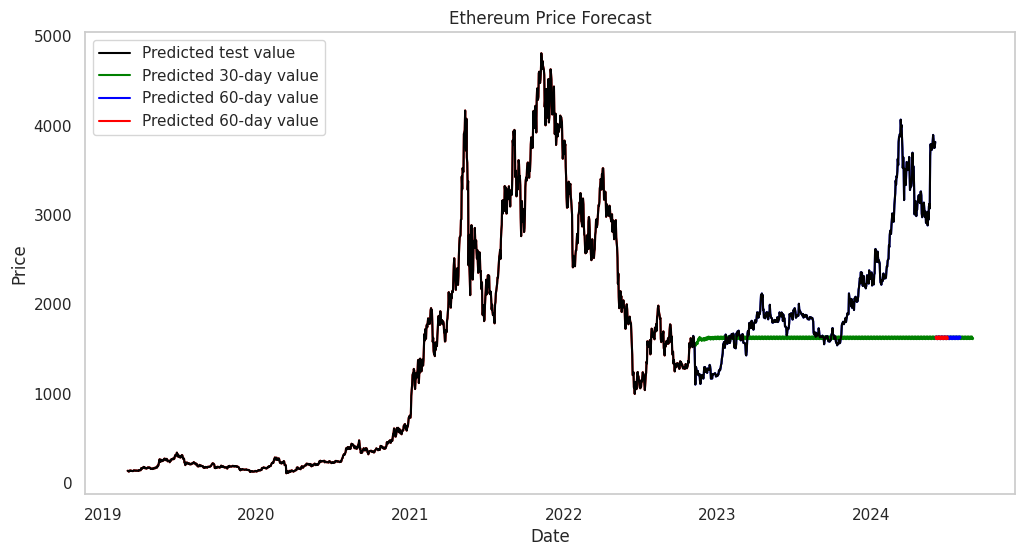

In [249]:
plt.figure(figsize=(12, 6))

plt.plot(train, color = "red")
plt.plot(test, color = "blue")
plt.plot(predictions, color = "green")

# title and axis captions
plt.title("Train set, ")
plt.ylabel("Price")
plt.xlabel('Years')


plt.plot(eth_df['Price'], color = 'black', label='Predicted test value')
plt.plot(forecast_90, color = 'green', label='Predicted 30-day value')
plt.plot(forecast_60, color = 'blue', label='Predicted 60-day value')
plt.plot(forecast_30, color = 'red', label='Predicted 60-day value')

# title and axis captions
plt.title("Ethereum Price Forecast")
plt.ylabel("Price")
plt.xlabel('Date')

# add a legend
plt.legend()

# add a grid
plt.grid()

# display the plot
plt.show()


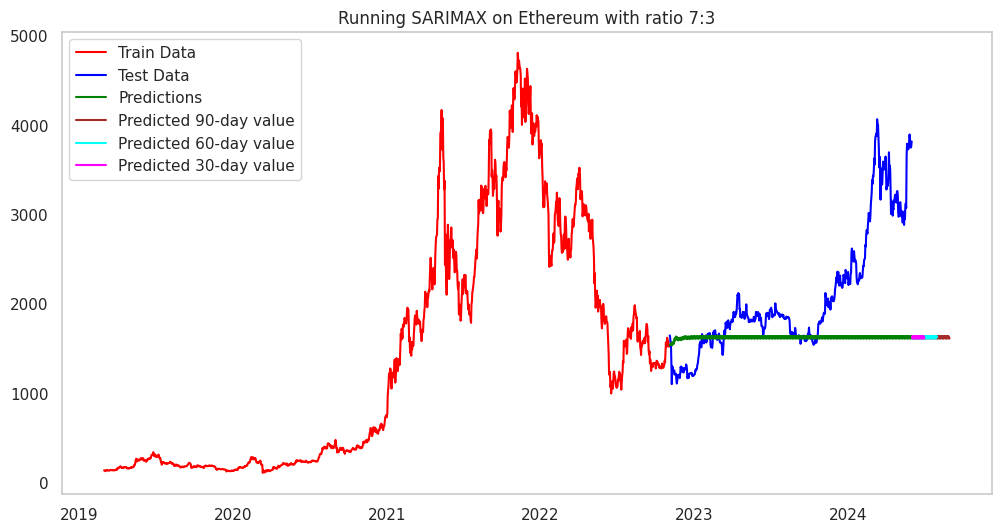

In [250]:
plt.figure(figsize=(12, 6))

# Vẽ dữ liệu train, test và predictions
plt.plot(train, color = "red", label='Train Data')
plt.plot(test, color = "blue", label='Test Data')
plt.plot(predictions, color = "green", label='Predictions')

# Vẽ dữ liệu giá Ethereum và các dự báo
#plt.plot(eth_df['Price'], color = 'black', label='Actual Price')
plt.plot(forecast_90, color = 'brown', label='Predicted 90-day value')
plt.plot(forecast_60, color = 'cyan', label='Predicted 60-day value')
plt.plot(forecast_30, color = 'magenta', label='Predicted 30-day value')

# Thiết lập tiêu đề và nhãn cho trục
plt.title("Running SARIMAX on Ethereum with ratio 7:3")
#plt.ylabel("Price")
#plt.xlabel('Date')

# Thêm chú giải
plt.legend()

# Thêm lưới
plt.grid()

# Hiển thị biểu đồ
plt.show()


###Split data 8:2



In [251]:
window_size = 10
feature_dim = 5

train_size = 0.7
test_size = 0.3

# model params
lstm_neurons = 20
rnn_neurons = 20
epochs = 100
batch_size = 4
loss = 'mae'
dropout = 0.25
optimizer = 'adam'

In [252]:
train_index = int(len(eth_df)*train_size)
train_index

1344

In [253]:
eth_df_train = eth_df.iloc[:train_index]
eth_df_test  = eth_df[train_index:]

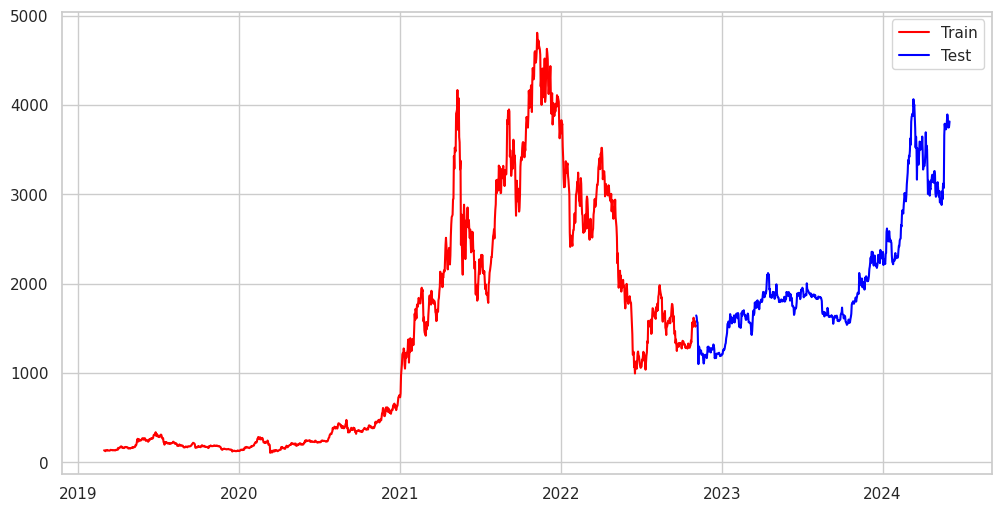

In [254]:
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(eth_df_train).index.to_list(), pd.DataFrame(eth_df_train['Price']), color='red', label='Train')
plt.plot(pd.DataFrame(eth_df_test).index.to_list(),pd.DataFrame(eth_df_test['Price']),color='blue' ,label ='Test')
plt.legend()
plt.show()

In [255]:
eth_df['Price_diff'] = eth_df['Price'].diff(periods=7)
eth_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1920 entries, 2019-03-01 to 2024-06-01
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        1920 non-null   float64
 1   Open         1920 non-null   float64
 2   High         1920 non-null   float64
 3   Low          1920 non-null   float64
 4   Vol.         1920 non-null   float64
 5   Change %     1920 non-null   float64
 6   Price_diff   1913 non-null   float64
 7   month_index  1920 non-null   int32  
dtypes: float64(7), int32(1)
memory usage: 127.5 KB


In [256]:
eth_df

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-01,135.72,135.47,138.06,128.46,9730000.0,0.0018,NaN,3
2019-03-02,132.76,135.72,136.36,130.74,11290000.0,-0.0218,NaN,3
2019-03-03,131.01,132.77,168.42,129.05,10640000.0,-0.0132,NaN,3
2019-03-04,125.97,131.02,131.57,123.25,14110000.0,-0.0385,NaN,3
2019-03-05,136.82,125.97,141.11,125.44,16740000.0,0.0861,NaN,3
...,...,...,...,...,...,...,...,...
2024-05-28,3845.56,3894.33,3929.21,3775.08,436240.0,-0.0125,55.10,5
2024-05-29,3769.57,3845.56,3886.44,3745.72,353250.0,-0.0198,30.49,5
2024-05-30,3747.55,3767.22,3824.94,3703.74,293810.0,-0.0058,-38.10,5


In [257]:
eth_df['Price_diff'].fillna(method='backfill', inplace=True)

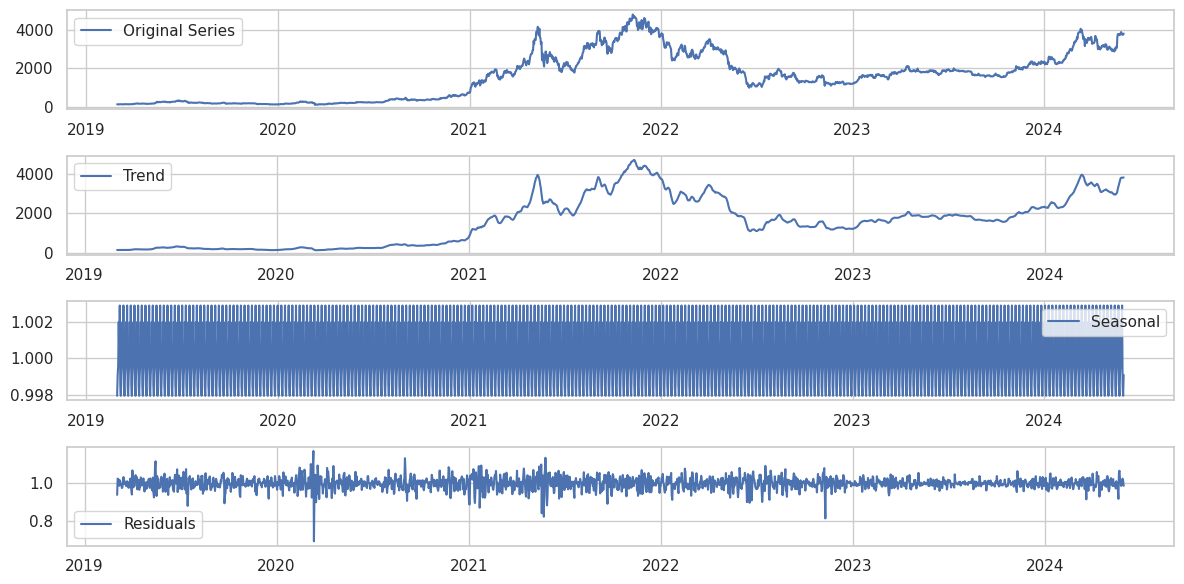

In [258]:
result = seasonal_decompose(eth_df['Price'], model='multiplicative', period=7)
trend = result.trend.dropna()
seasonal = result.seasonal.dropna()
residual = result.resid.dropna()

# Plot the decomposed components
plt.figure(figsize=(12,6))

plt.subplot(4, 1, 1)
plt.plot(eth_df['Price'], label='Original Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()
# for fun i guess

In [259]:
eth_df['month_index'] = eth_df.index.month
eth_df

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-01,135.72,135.47,138.06,128.46,9730000.0,0.0018,-1.87,3
2019-03-02,132.76,135.72,136.36,130.74,11290000.0,-0.0218,-1.87,3
2019-03-03,131.01,132.77,168.42,129.05,10640000.0,-0.0132,-1.87,3
2019-03-04,125.97,131.02,131.57,123.25,14110000.0,-0.0385,-1.87,3
2019-03-05,136.82,125.97,141.11,125.44,16740000.0,0.0861,-1.87,3
...,...,...,...,...,...,...,...,...
2024-05-28,3845.56,3894.33,3929.21,3775.08,436240.0,-0.0125,55.10,5
2024-05-29,3769.57,3845.56,3886.44,3745.72,353250.0,-0.0198,30.49,5
2024-05-30,3747.55,3767.22,3824.94,3703.74,293810.0,-0.0058,-38.10,5


In [260]:
df_monthly = eth_df.resample('M').mean()
df_monthly

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-31,136.375161,136.172581,140.065484,133.572258,1.167710e+07,0.001752,0.784516,3.0
2019-04-30,165.005667,164.344333,169.412667,159.621333,1.186200e+07,0.005223,4.618000,4.0
2019-05-31,219.652581,216.219677,227.308065,209.318387,1.344806e+07,0.017661,23.737419,5.0
2019-06-30,274.209333,273.389000,282.697333,264.795667,8.730000e+06,0.003943,11.260333,6.0
2019-07-31,247.334516,249.753226,256.461290,238.759032,9.371613e+06,-0.008245,-22.530323,7.0
...,...,...,...,...,...,...,...,...
2024-02-29,2746.431724,2710.027241,2782.710690,2672.922759,4.425869e+05,0.013400,214.253793,2.0
2024-03-31,3626.963871,3616.920968,3722.042258,3501.579032,5.989626e+05,0.003642,88.199032,3.0
2024-04-30,3246.043333,3267.134667,3340.207000,3150.657667,4.535570e+05,-0.005713,-90.864667,4.0


<Axes: xlabel='Date'>

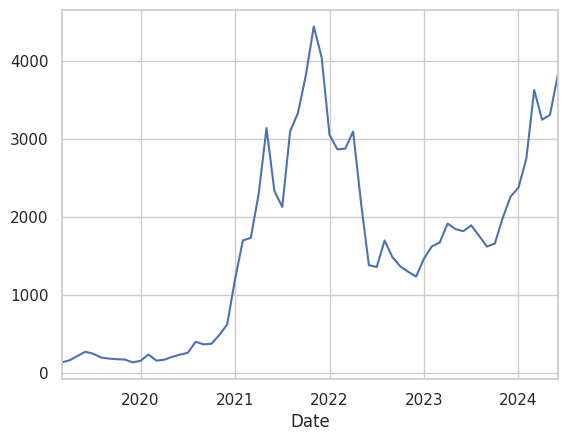

In [261]:
df_monthly['Price'].plot()

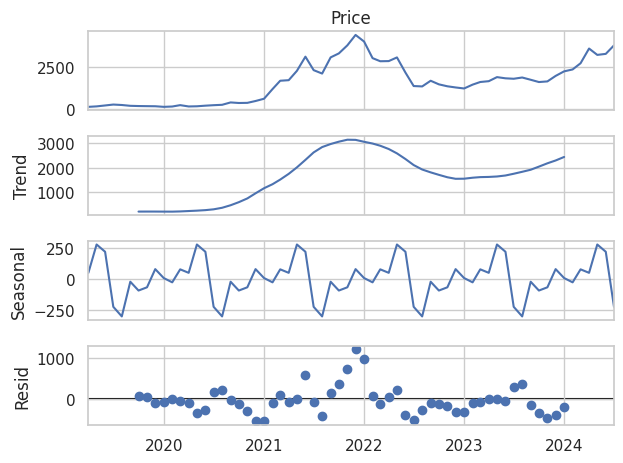

In [262]:
decompose = seasonal_decompose(df_monthly['Price'])
decompose.plot()

plt.show()

In [ ]:
#import pmdarima as pm
#model = pm.auto_arima(df_monthly['Price'], trace = True,start_P=0, seasonal=True,exogenous=eth_df['month_index'],
					#	d=None, D=1,m=12,
				#		error_action='ignore',
					#	suppress_warnings=True,
				#		stepwise=True)

In [263]:
train = eth_df_train['Price']
test = eth_df_test['Price']
start = len(train)
end = len(train) +len(test) -1

In [264]:
import pmdarima as pm
model = pm.auto_arima(train, trace = True,start_P=0, seasonal=True,exogenous=eth_df['month_index'],
						d=None, D=1,m=7,max_p=3, max_d=2, max_q=3,
						error_action='ignore',
						suppress_warnings=True,
						stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,1,1)[7] intercept   : AIC=inf, Time=9.31 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=18388.991, Time=0.12 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=16412.058, Time=3.75 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=17529.516, Time=1.72 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=18388.361, Time=0.07 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=16733.806, Time=0.15 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=16223.062, Time=5.87 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=13.60 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=8.25 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=18383.687, Time=1.34 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=16218.891, Time=15.18 sec
 ARIMA(2,0,0)(1,1,0)[7] intercept   : AIC=16407.649, Time=2.52 sec
 ARIMA(2,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=12.86 sec
 ARIMA(2,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=4.66 sec
 ARIMA(3,0,0)(2,1,0)[7] intercept   : AIC=1621

In [265]:

model_sarimax = sm.tsa.statespace.SARIMAX(train,
                                          order = (3,0,0),
                                          seasonal_order = (2,1,0,7))
result = model_sarimax.fit()

In [266]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Price   No. Observations:                 1344
Model:             SARIMAX(3, 0, 0)x(2, 1, 0, 7)   Log Likelihood               -8100.064
Date:                           Wed, 19 Jun 2024   AIC                          16212.128
Time:                                   08:52:07   BIC                          16243.318
Sample:                               03-01-2019   HQIC                         16223.814
                                    - 11-03-2022                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8752      0.017     51.378      0.000       0.842       0.909
ar.L2          0.1305      0.019      6.767      0.000       0.093       0.168
ar.L3         -0.0718      0.013     -5.667      0.000      -0.097      -0.047
ar.S.L7       -0.6587      0.012    -53.875      0.000      -0.683      -0.635
ar.S.L14      -0.3631      0.014    -25.999      0.000      -0.390      -0.336
sigma2      1.067e+04    194.816     54.775      0.000    1.03e+04    1.11e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              4575.79
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):             143.08   Skew:                            -0.64
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [267]:
predictions = result.predict(start, end)
predictions

2022-11-04    1533.416643
2022-11-05    1545.509323
2022-11-06    1551.386495
2022-11-07    1540.104851
2022-11-08    1560.889524
                 ...     
2024-05-28    1638.726459
2024-05-29    1629.043522
2024-05-30    1608.421287
2024-05-31    1617.153720
2024-06-01    1638.872325
Freq: D, Name: predicted_mean, Length: 576, dtype: float64

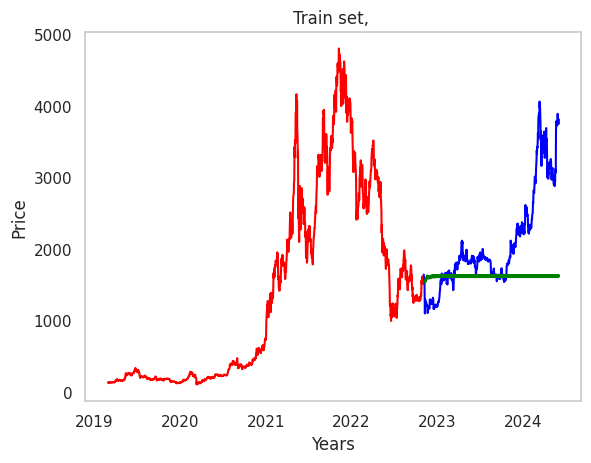

In [268]:
plt.plot(train, color = "red")
plt.plot(test, color = "blue")
plt.plot(predictions, color = "green")

# title and axis captions
plt.title("Train set, ")
plt.ylabel("Price")
plt.xlabel('Years')

# add a grid
plt.grid()

plt.show()

In [269]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np
from sklearn.metrics import mean_squared_error

In [270]:
print('MAPE = ', mean_absolute_percentage_error(test, predictions))
print('MAE = ', mean_absolute_error(test, predictions))
print('RMSE = ', np.sqrt(mean_squared_error(test, predictions)))

MAPE =  0.2208298549455342
MAE =  553.7025911533356
RMSE =  829.2507627971385


In [271]:
start = len(eth_df)

end = (len(eth_df) - 1) + 30

forecast_30 = result.predict(start, end)

In [272]:
start = len(eth_df)


end = (len(eth_df) - 1) + 60


forecast_60 = result.predict(start, end)

In [273]:
start = len(eth_df)


end = (len(eth_df) - 1) + 90


forecast_90 = result.predict(start, end)

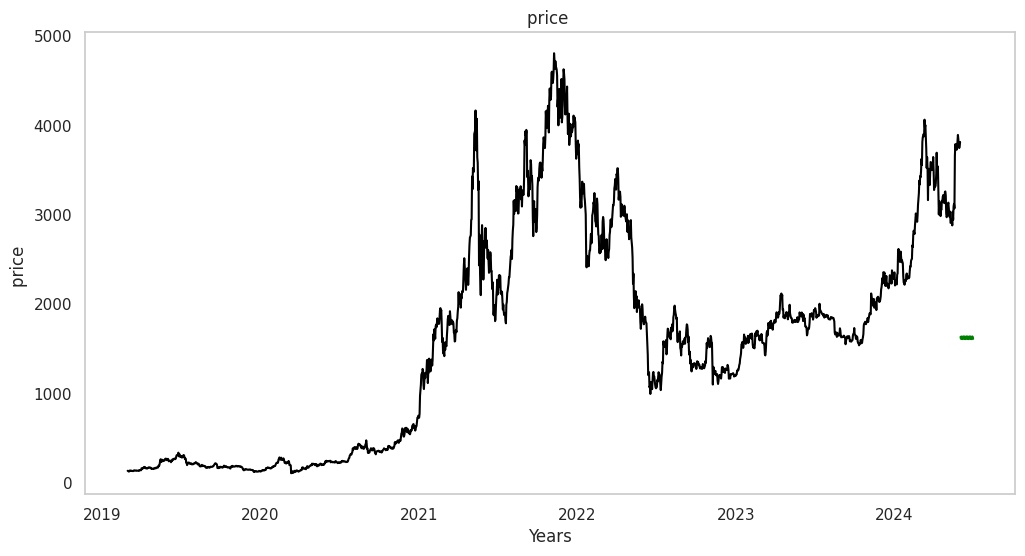

In [274]:
plt.figure(figsize=(12, 6))
plt.plot(eth_df['Price'], color = 'black')
plt.plot(forecast_30, color = 'green')

# title and axis captions
plt.title("price ")
plt.ylabel("price ")
plt.xlabel('Years')

# add a grid
plt.grid()

plt.show()

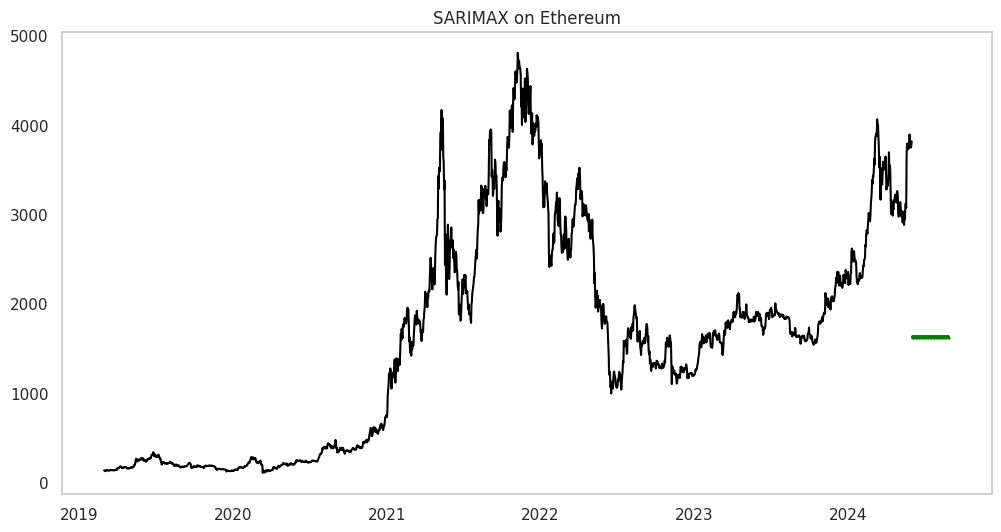

In [275]:
plt.figure(figsize=(12, 6))
plt.plot(eth_df['Price'], color = 'black')
plt.plot(forecast_90, color = 'green')

# title and axis captions
#plt.title("Close price ")
#plt.ylabel("Close price ")
#plt.xlabel('Years')

# add a grid
plt.title("SARIMAX on Ethereum")
plt.grid()

plt.show()

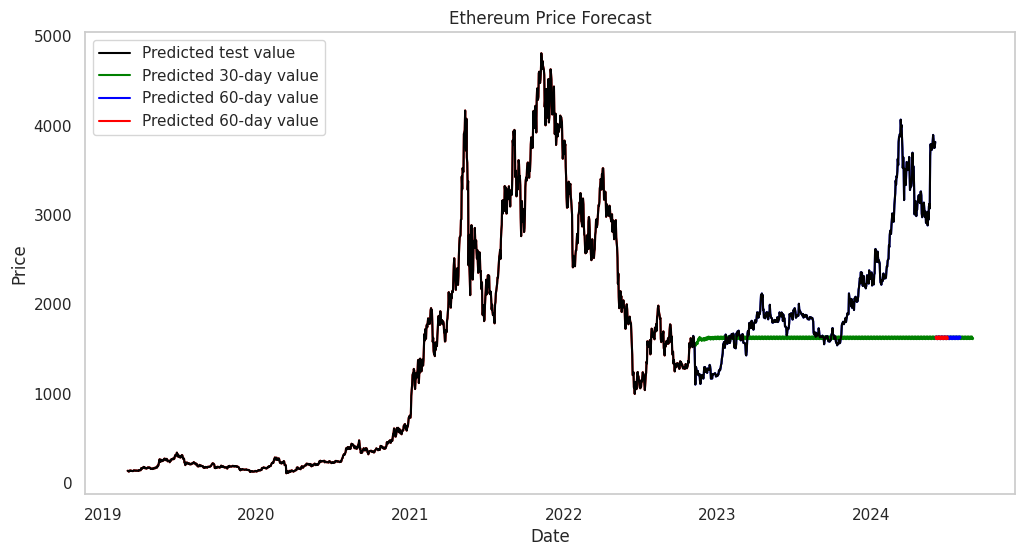

In [276]:
plt.figure(figsize=(12, 6))

plt.plot(train, color = "red")
plt.plot(test, color = "blue")
plt.plot(predictions, color = "green")

# title and axis captions
plt.title("Train set, ")
plt.ylabel("Price")
plt.xlabel('Years')


plt.plot(eth_df['Price'], color = 'black', label='Predicted test value')
plt.plot(forecast_90, color = 'green', label='Predicted 30-day value')
plt.plot(forecast_60, color = 'blue', label='Predicted 60-day value')
plt.plot(forecast_30, color = 'red', label='Predicted 60-day value')

# title and axis captions
plt.title("Ethereum Price Forecast")
plt.ylabel("Price")
plt.xlabel('Date')

# add a legend
plt.legend()

# add a grid
plt.grid()

# display the plot
plt.show()


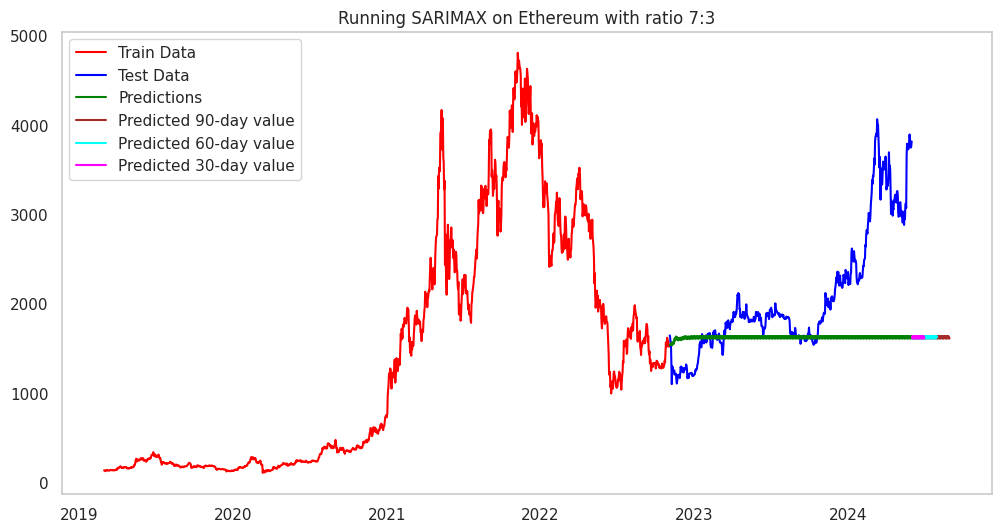

In [277]:
plt.figure(figsize=(12, 6))

# Vẽ dữ liệu train, test và predictions
plt.plot(train, color = "red", label='Train Data')
plt.plot(test, color = "blue", label='Test Data')
plt.plot(predictions, color = "green", label='Predictions')

# Vẽ dữ liệu giá Ethereum và các dự báo
#plt.plot(eth_df['Price'], color = 'black', label='Actual Price')
plt.plot(forecast_90, color = 'brown', label='Predicted 90-day value')
plt.plot(forecast_60, color = 'cyan', label='Predicted 60-day value')
plt.plot(forecast_30, color = 'magenta', label='Predicted 30-day value')

# Thiết lập tiêu đề và nhãn cho trục
plt.title("Running SARIMAX on Ethereum with ratio 8:2")
#plt.ylabel("Price")
#plt.xlabel('Date')

# Thêm chú giải
plt.legend()

# Thêm lưới
plt.grid()

# Hiển thị biểu đồ
plt.show()


###Implementing with SARIMAX

[Text(0.5, 1.0, 'Price of Ethereum for the period from 2019 to 2024 inclusive'),
 Text(0.5, 0, 'Years'),
 Text(0, 0.5, 'Price')]

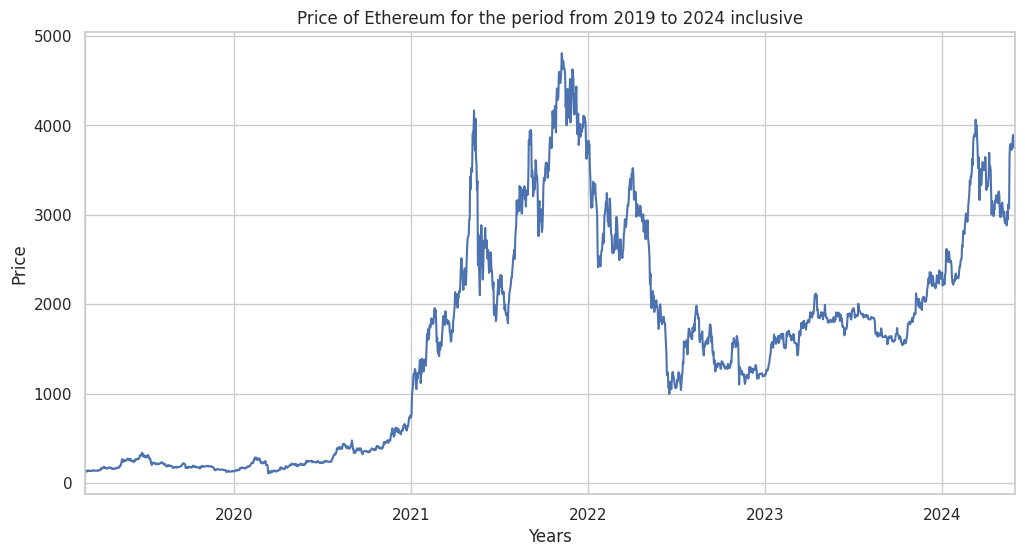

In [ ]:
ax = eth_df[['Price']].plot(figsize = (12,6), legend = None)
ax.set(title = "Price of Ethereum for the period from 2019 to 2024 inclusive", xlabel = 'Years', ylabel = "Price")

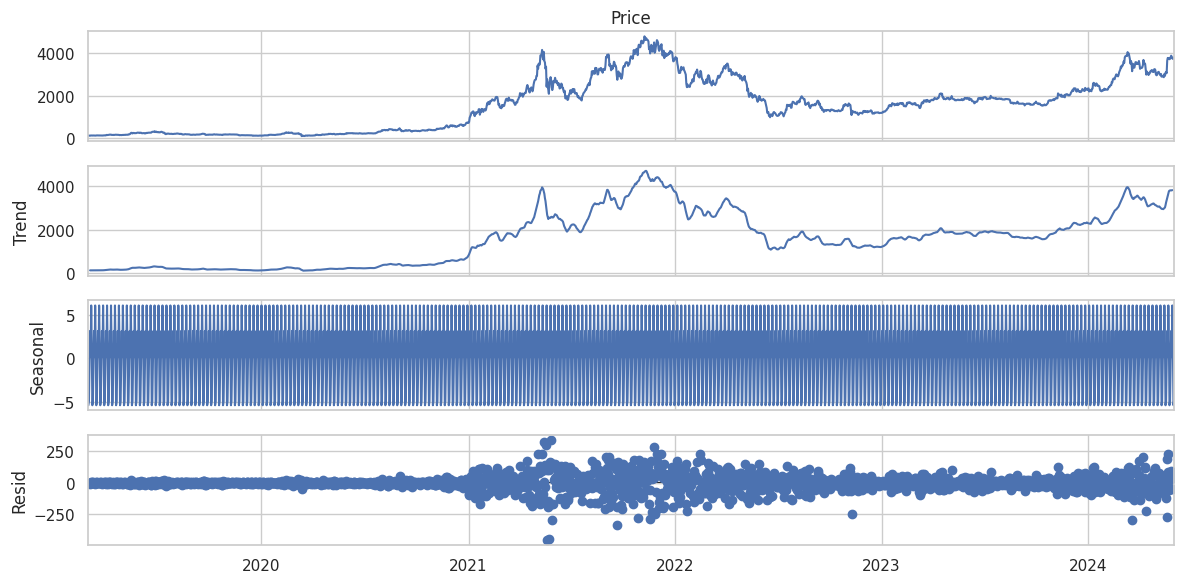

In [ ]:
# importing the seasonal_decompose function from statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

# setting the size of the graph
from pylab import rcParams
rcParams['figure.figsize'] = 12, 6

# applying the function to the data
decompose = seasonal_decompose(df_monthly)
decompose.plot()

plt.show()

In [ ]:
# The Dickey-Fuller test is used to check stationarity
# importing the necessary function
from statsmodels.tsa.stattools import adfuller

# we will give it a column with data on transportation and put the result in adf_test
adf_test = adfuller(eth_df[['Price']])

# output p-value
print('p-value: ' + str(adf_test[1]))

p-value: 0.701427851825546


In [ ]:
eps_diff = np.diff(eth_df['Price'], n=1)    # Apply a first-order difference, since our time series is not stationary

ad_fuller_result = adfuller(eps_diff)  # Test for stationarity

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -10.801965996856609
p-value: 2.0071483989125784e-19


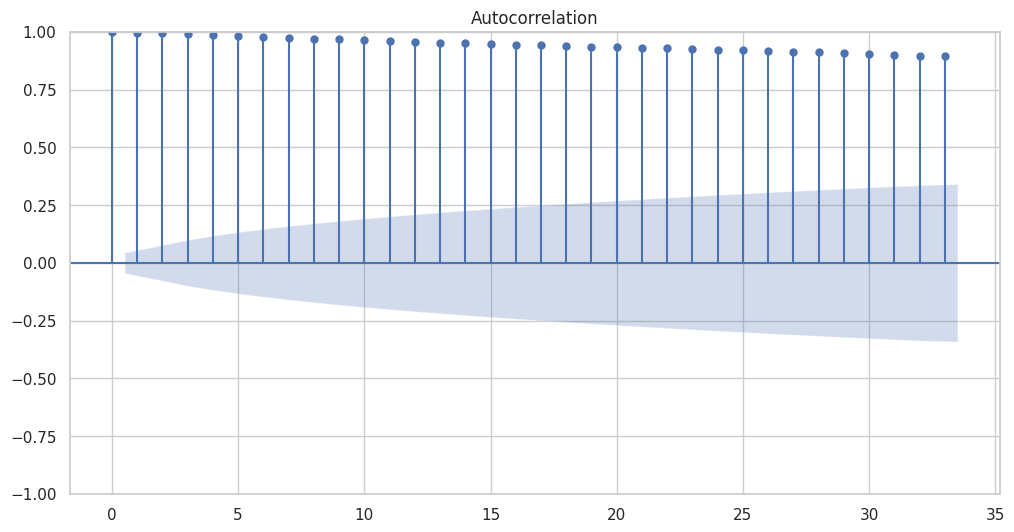

In [ ]:
# let's build an autocorrelation graph for our data
plot_acf(eth_df[['Price']])
plt.show()

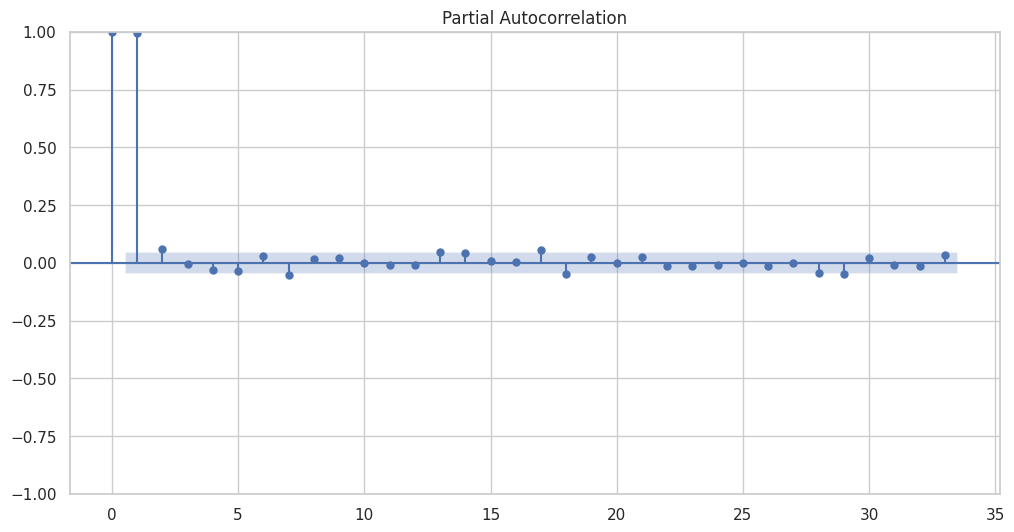

In [ ]:
plot_pacf(eth_df[['Price']]);


In [ ]:
eth_df['date_index'] = eth_df.index.date
eth_df

,Price,Open,High,Low,Vol.,Change %,date_index
Date,,,,,,,
2019-03-01,135.72,135.47,138.06,128.46,9730000.0,0.0018,2019-03-01
2019-03-02,132.76,135.72,136.36,130.74,11290000.0,-0.0218,2019-03-02
2019-03-03,131.01,132.77,168.42,129.05,10640000.0,-0.0132,2019-03-03
2019-03-04,125.97,131.02,131.57,123.25,14110000.0,-0.0385,2019-03-04
2019-03-05,136.82,125.97,141.11,125.44,16740000.0,0.0861,2019-03-05
...,...,...,...,...,...,...,...
2024-05-28,3845.56,3894.33,3929.21,3775.08,436240.0,-0.0125,2024-05-28
2024-05-29,3769.57,3845.56,3886.44,3745.72,353250.0,-0.0198,2024-05-29
2024-05-30,3747.55,3767.22,3824.94,3703.74,293810.0,-0.0058,2024-05-30


In [ ]:
import pmdarima as pm
model = pm.auto_arima(eth_df['Price'], trace = True,start_P=0, seasonal=True,exogenous=eth_df['date_index'],
						d=None, D=1,m=7,max_p=3, max_d=2, max_q=3,
						error_action='ignore',
						suppress_warnings=True,
						stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,1,1)[7] intercept   : AIC=inf, Time=13.01 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=26055.170, Time=0.14 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=23170.498, Time=4.09 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=24791.017, Time=2.41 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=26060.355, Time=0.10 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=23667.577, Time=0.19 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=22923.368, Time=12.01 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=11.47 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=5.71 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=26051.399, Time=2.33 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=22919.944, Time=13.03 sec
 ARIMA(2,0,0)(1,1,0)[7] intercept   : AIC=23165.836, Time=4.61 sec
 ARIMA(2,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=17.48 sec
 ARIMA(2,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=5.39 sec
 ARIMA(3,0,0)(2,1,0)[7] intercept   : AIC=22

##DRAFT

###split 6:4

In [ ]:
window_size = 10
feature_dim = 5

train_size = 0.6
test_size = 0.4

# model params
lstm_neurons = 20
rnn_neurons = 20
epochs = 100
batch_size = 4
loss = 'mae'
dropout = 0.25
optimizer = 'adam'

In [ ]:
train_index = int(len(eth_df['Price'])*train_size)
train_index

1152

In [ ]:
len(eth_df['Price'])

1920

In [ ]:
# the training set will include data up to and including December 2016
train = eth_df['Price'][:train_index]

# test set will start from January 2017 (essentially one year)
test = eth_df['Price'][train_index:]

In [ ]:
print(len(train))


1152


In [ ]:
print(len(test))

768


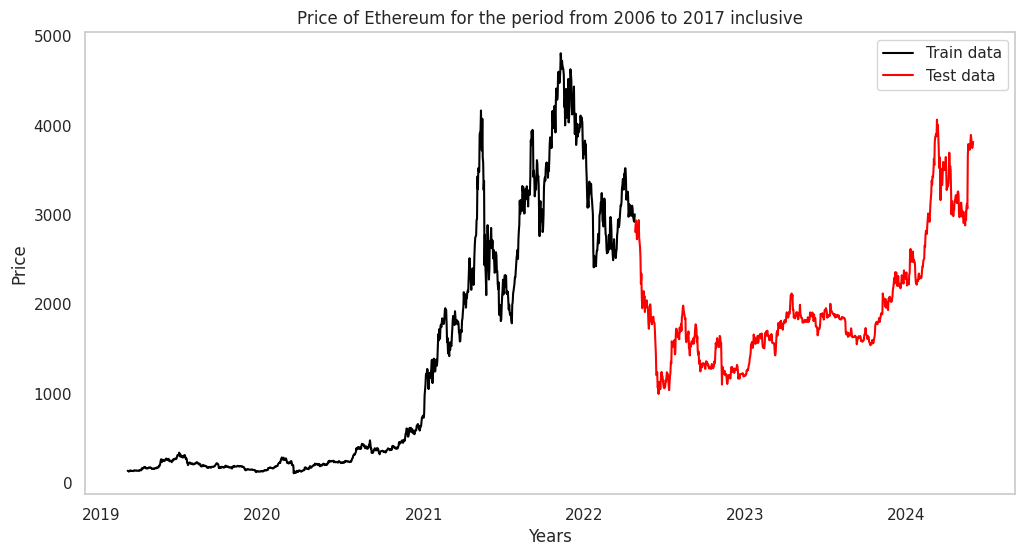

In [ ]:
plt.plot(train, color = "black", label ='Train data')
plt.plot(test, color = "red", label = 'Test data')

# title and axis captions
plt.title("Price of Ethereum for the period from 2006 to 2017 inclusive")
plt.ylabel("Price")
plt.xlabel('Years')

# add a grid
plt.grid()
plt.legend()
plt.show()

In [ ]:
# forcibly disable system warnings
import warnings
warnings.simplefilter(action = 'ignore', category = Warning)

# let's train the model with the appropriate parameters, SARIMAX(3, 0, 0)x(2, 1, 0, 7)
# importing the model class
from statsmodels.tsa.statespace.sarimax import SARIMAX

# let's create an object of this model
model = SARIMAX(train,
                order = (3, 0, 0),
                seasonal_order = (2, 1, 0, 7),
                enforce_stationarity = False,
                enforce_invertibility = False)

# apply the method fit
result = model.fit(maxiter = 500, method = 'nm')

Optimization terminated successfully.
         Current function value: 5.951646
         Iterations: 390
         Function evaluations: 616


In [ ]:
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Price   No. Observations:                 1152
Model:             SARIMAX(3, 0, 0)x(2, 1, 0, 7)   Log Likelihood               -6856.296
Date:                           Wed, 19 Jun 2024   AIC                          13724.592
Time:                                   05:01:57   BIC                          13754.761
Sample:                               03-01-2019   HQIC                         13735.991
                                    - 04-25-2022                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8792      0.018     48.160      0.000       0.843       0.915
ar.L2          0.1136      0.021      5.483      0.000       0.073       0.154
ar.L3         -0.0618      0.013     -4.599      0.000      -0.088      -0.035
ar.S.L7       -0.6684      0.013    -51.367      0.000      -0.694      -0.643
ar.S.L14      -0.3677      0.015    -24.515      0.000      -0.397      -0.338
sigma2      1.114e+04    217.747     51.180      0.000    1.07e+04    1.16e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              4455.07
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):             223.63   Skew:                            -0.67
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# the test forecast period will start from the end of the training period
start = len(train)

# and it will end at the end of the test
end = len(train) + len(test) - 1

# apply the method predict
predictions = result.predict(start, end)
predictions

2022-04-26    3001.360148
2022-04-27    2953.359140
2022-04-28    2926.989879
2022-04-29    2924.884852
2022-04-30    2953.933237
                 ...     
2024-05-28    2903.838368
2024-05-29    2897.523728
2024-05-30    2845.890868
2024-05-31    2849.803340
2024-06-01    2864.544173
Freq: D, Name: predicted_mean, Length: 768, dtype: float64

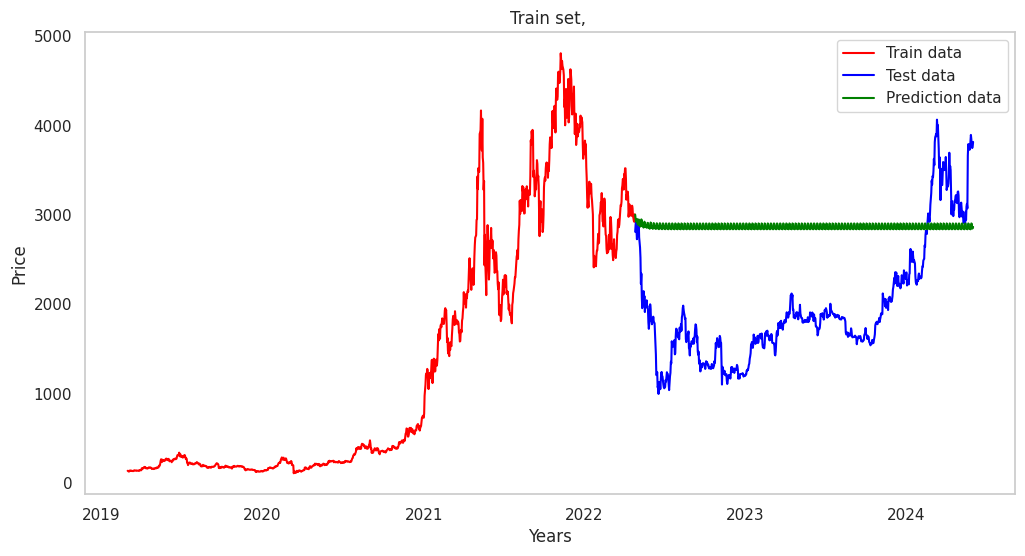

In [ ]:
plt.plot(train, color = "red", label ='Train data')
plt.plot(test, color = "blue", label = 'Test data')
plt.plot(predictions, color = "green", label = 'Prediction data')

# title and axis captions
plt.title("Train set, ")
plt.ylabel("Price")
plt.xlabel('Years')

# add a grid
plt.grid()
plt.legend()
plt.show()

In [ ]:
train = eth_df_train['Price']
test = eth_df_test['Price']
start = len(train)
end = len(train) +len(test) -1

In [ ]:
start = len(eth_df)

end = (len(eth_df) - 1) + 30

forecast_30 = result.predict(start, end)

start = len(eth_df)


end = (len(eth_df) - 1) + 60


forecast_60 = result.predict(start, end)
start = len(eth_df)


end = (len(eth_df) - 1) + 90


forecast_90 = result.predict(start, end)

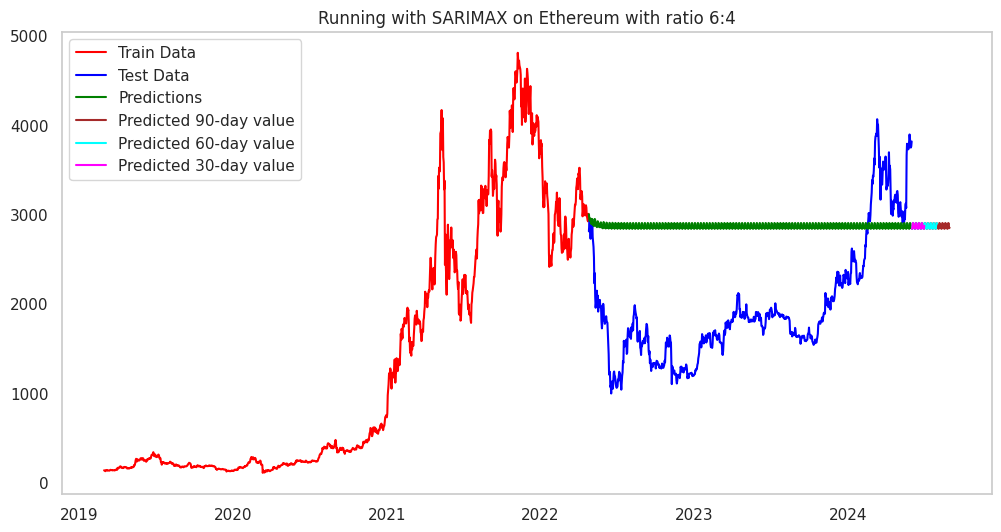

In [ ]:
plt.figure(figsize=(12, 6))

# Vẽ dữ liệu train, test và predictions
plt.plot(train, color = "red", label='Train Data')
plt.plot(test, color = "blue", label='Test Data')
plt.plot(predictions, color = "green", label='Predictions')

# Vẽ dữ liệu giá Ethereum và các dự báo
#plt.plot(eth_df['Price'], color = 'black', label='Actual Price')
plt.plot(forecast_90, color = 'brown', label='Predicted 90-day value')
plt.plot(forecast_60, color = 'cyan', label='Predicted 60-day value')
plt.plot(forecast_30, color = 'magenta', label='Predicted 30-day value')

# Thiết lập tiêu đề và nhãn cho trục
plt.title("Running with SARIMAX on Ethereum with ratio 6:4")
#plt.ylabel("Price")
#plt.xlabel('Date')

# Thêm chú giải
plt.legend()

# Thêm lưới
plt.grid()

# Hiển thị biểu đồ
plt.show()


In [ ]:
print('MAPE = ', mean_absolute_percentage_error(test, predictions))
print('MAE = ', mean_absolute_error(test, predictions))
print('RMSE = ', np.sqrt(mean_squared_error(test, predictions)))

MAPE =  0.6462757582014028
MAE =  1042.5280957890034
RMSE =  1126.5135393507383


###Split data 7:3

In [ ]:
window_size = 10
feature_dim = 5

train_size = 0.7
test_size = 0.3

# model params
lstm_neurons = 20
rnn_neurons = 20
epochs = 100
batch_size = 4
loss = 'mae'
dropout = 0.25
optimizer = 'adam'

In [ ]:
train_index = int(len(eth_df)*train_size)
train_index

1344

In [ ]:
eth_df_train = eth_df.iloc[:train_index]
eth_df_test  = eth_df[train_index:]

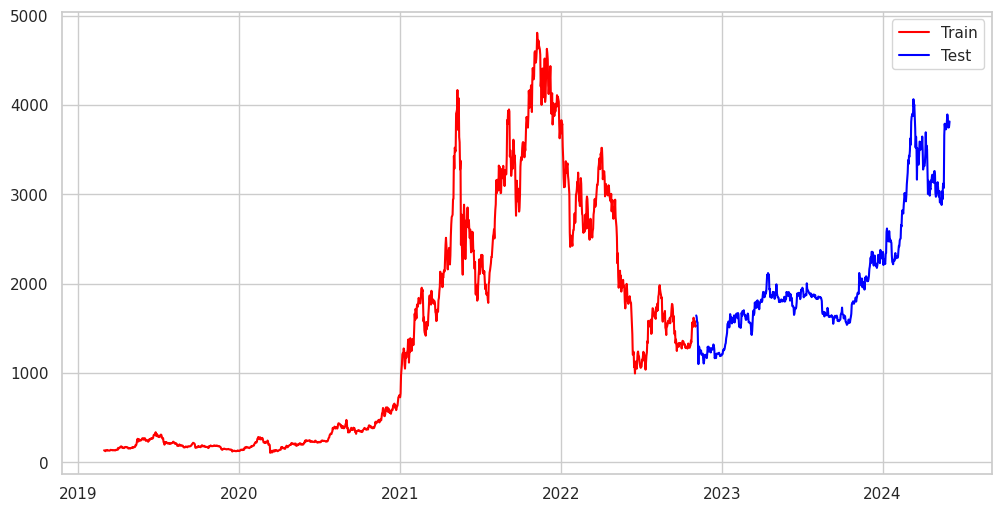

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(eth_df_train).index.to_list(), pd.DataFrame(eth_df_train['Price']), color='red', label='Train')
plt.plot(pd.DataFrame(eth_df_test).index.to_list(),pd.DataFrame(eth_df_test['Price']),color='blue' ,label ='Test')
plt.legend()
plt.show()

In [ ]:
eth_df['Price_diff'] = eth_df['Price'].diff(periods=7)
eth_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1920 entries, 2019-03-01 to 2024-06-01
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       1920 non-null   float64
 1   Open        1920 non-null   float64
 2   High        1920 non-null   float64
 3   Low         1920 non-null   float64
 4   Vol.        1920 non-null   float64
 5   Change %    1920 non-null   float64
 6   Price_diff  1913 non-null   float64
dtypes: float64(7)
memory usage: 120.0 KB


In [ ]:
eth_df

,Price,Open,High,Low,Vol.,Change %,Price_diff
Date,,,,,,,
2019-03-01,135.72,135.47,138.06,128.46,9730000.0,0.0018,NaN
2019-03-02,132.76,135.72,136.36,130.74,11290000.0,-0.0218,NaN
2019-03-03,131.01,132.77,168.42,129.05,10640000.0,-0.0132,NaN
2019-03-04,125.97,131.02,131.57,123.25,14110000.0,-0.0385,NaN
2019-03-05,136.82,125.97,141.11,125.44,16740000.0,0.0861,NaN
...,...,...,...,...,...,...,...
2024-05-28,3845.56,3894.33,3929.21,3775.08,436240.0,-0.0125,55.10
2024-05-29,3769.57,3845.56,3886.44,3745.72,353250.0,-0.0198,30.49
2024-05-30,3747.55,3767.22,3824.94,3703.74,293810.0,-0.0058,-38.10


In [ ]:
eth_df['Price_diff'].fillna(method='backfill', inplace=True)

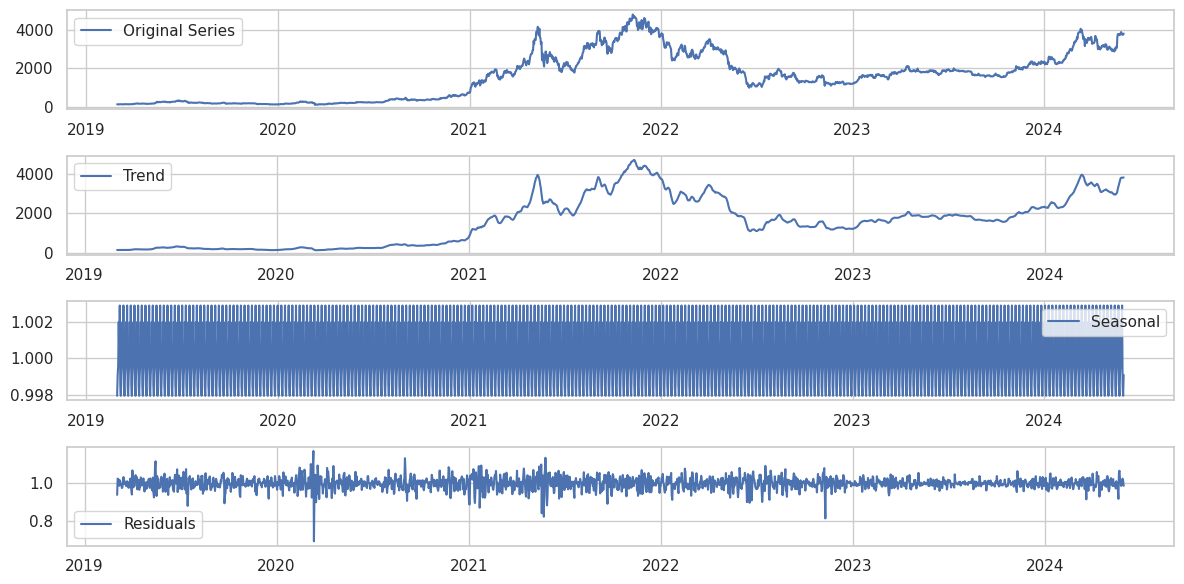

In [ ]:
result = seasonal_decompose(eth_df['Price'], model='multiplicative', period=7)
trend = result.trend.dropna()
seasonal = result.seasonal.dropna()
residual = result.resid.dropna()

# Plot the decomposed components
plt.figure(figsize=(12,6))

plt.subplot(4, 1, 1)
plt.plot(eth_df['Price'], label='Original Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()
# for fun i guess

In [ ]:
eth_df['month_index'] = eth_df.index.month
eth_df

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-01,135.72,135.47,138.06,128.46,9730000.0,0.0018,-1.87,3
2019-03-02,132.76,135.72,136.36,130.74,11290000.0,-0.0218,-1.87,3
2019-03-03,131.01,132.77,168.42,129.05,10640000.0,-0.0132,-1.87,3
2019-03-04,125.97,131.02,131.57,123.25,14110000.0,-0.0385,-1.87,3
2019-03-05,136.82,125.97,141.11,125.44,16740000.0,0.0861,-1.87,3
...,...,...,...,...,...,...,...,...
2024-05-28,3845.56,3894.33,3929.21,3775.08,436240.0,-0.0125,55.10,5
2024-05-29,3769.57,3845.56,3886.44,3745.72,353250.0,-0.0198,30.49,5
2024-05-30,3747.55,3767.22,3824.94,3703.74,293810.0,-0.0058,-38.10,5


In [ ]:
df_monthly = eth_df.resample('M').mean()
df_monthly

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-31,136.375161,136.172581,140.065484,133.572258,1.167710e+07,0.001752,0.784516,3.0
2019-04-30,165.005667,164.344333,169.412667,159.621333,1.186200e+07,0.005223,4.618000,4.0
2019-05-31,219.652581,216.219677,227.308065,209.318387,1.344806e+07,0.017661,23.737419,5.0
2019-06-30,274.209333,273.389000,282.697333,264.795667,8.730000e+06,0.003943,11.260333,6.0
2019-07-31,247.334516,249.753226,256.461290,238.759032,9.371613e+06,-0.008245,-22.530323,7.0
...,...,...,...,...,...,...,...,...
2024-02-29,2746.431724,2710.027241,2782.710690,2672.922759,4.425869e+05,0.013400,214.253793,2.0
2024-03-31,3626.963871,3616.920968,3722.042258,3501.579032,5.989626e+05,0.003642,88.199032,3.0
2024-04-30,3246.043333,3267.134667,3340.207000,3150.657667,4.535570e+05,-0.005713,-90.864667,4.0


<Axes: xlabel='Date'>

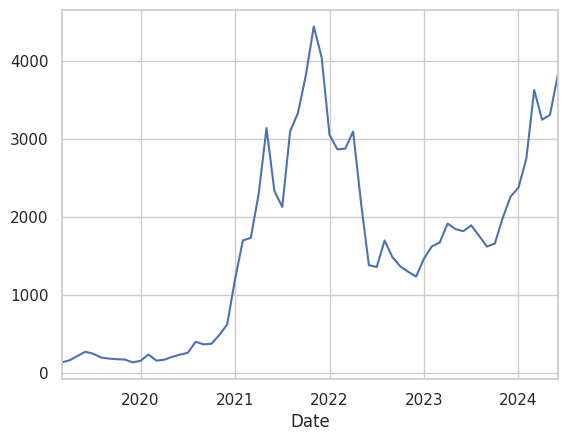

In [ ]:
df_monthly['Price'].plot()

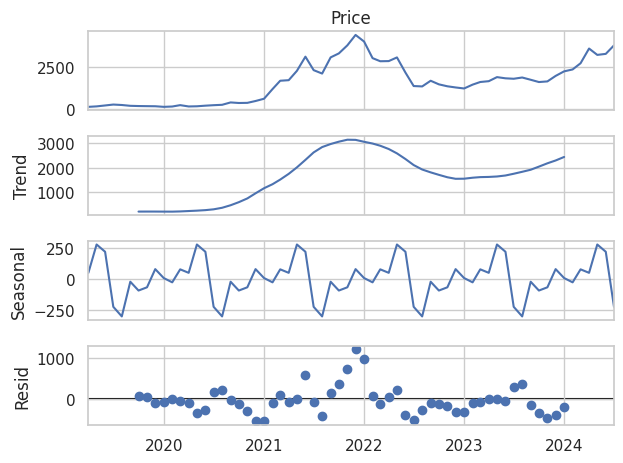

In [ ]:
decompose = seasonal_decompose(df_monthly['Price'])
decompose.plot()

plt.show()

In [ ]:
#import pmdarima as pm
#model = pm.auto_arima(df_monthly['Price'], trace = True,start_P=0, seasonal=True,exogenous=eth_df['month_index'],
					#	d=None, D=1,m=12,
				#		error_action='ignore',
					#	suppress_warnings=True,
				#		stepwise=True)

In [ ]:
import pmdarima as pm
model = pm.auto_arima(eth_df['Price'], trace = True,start_P=0, seasonal=True,exogenous=eth_df['month_index'],
						d=None, D=1,m=7,max_p=3, max_d=2, max_q=3,
						error_action='ignore',
						suppress_warnings=True,
						stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,1,1)[7] intercept   : AIC=inf, Time=30.39 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=26055.170, Time=0.16 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=23170.498, Time=8.84 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=24791.017, Time=9.01 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=26060.355, Time=0.15 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=23667.577, Time=0.25 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=22923.368, Time=11.70 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=11.78 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=7.63 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=26051.399, Time=1.41 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=22919.944, Time=14.93 sec
 ARIMA(2,0,0)(1,1,0)[7] intercept   : AIC=23165.836, Time=4.01 sec
 ARIMA(2,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=18.50 sec
 ARIMA(2,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=8.23 sec
 ARIMA(3,0,0)(2,1,0)[7] intercept   : AIC=22

In [ ]:
train = eth_df_train['Price']
test = eth_df_test['Price']
start = len(train)
end = len(train) +len(test) -1
model_sarimax = sm.tsa.statespace.SARIMAX(eth_df['Price'],
                                          order = (3,0,0),
                                          seasonal_order = (2,1,0,7))
result = SARIMAX(eth_df_train['Price'], order=(3, 0, 0), easonal_order = (2,1,0,7)).fit()
#result = model_sarimax.fit()

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                 1344
Model:               SARIMAX(3, 0, 0)   Log Likelihood               -7971.296
Date:                Tue, 18 Jun 2024   AIC                          15950.591
Time:                        16:51:52   BIC                          15971.405
Sample:                    03-01-2019   HQIC                         15958.388
                         - 11-03-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9134      0.016     55.809      0.000       0.881       0.946
ar.L2          0.1071      0.020      5.281      0.000       0.067       0.147
ar.L3         -0.0213      0.015     -1.465      0.143      -0.050       0.007
sigma2      8280.6098    124.982     66.254      0.000    8035.649    8525.571
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             10508.92
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):             149.16   Skew:                            -0.86
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
predictions = result.predict(start, end)
predictions

2022-11-04    1527.489040
2022-11-05    1526.790928
2022-11-06    1525.511893
2022-11-07    1524.345438
2022-11-08    1523.157903
                 ...     
2024-05-28     980.417691
2024-05-29     979.656196
2024-05-30     978.895292
2024-05-31     978.134979
2024-06-01     977.375257
Freq: D, Name: predicted_mean, Length: 576, dtype: float64

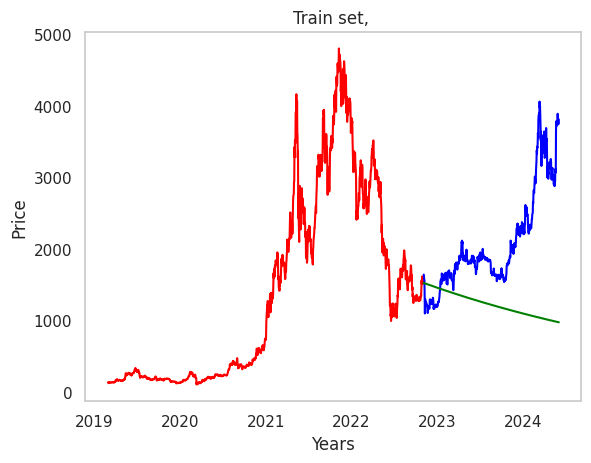

In [ ]:
plt.plot(train, color = "red")
plt.plot(test, color = "blue")
plt.plot(predictions, color = "green")

# title and axis captions
plt.title("Train set, ")
plt.ylabel("Price")
plt.xlabel('Years')

# add a grid
plt.grid()

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error


print('MAPE = ', mean_absolute_percentage_error(test, predictions))
print('MAE = ', mean_absolute_error(test, predictions))
print('RMSE = ', np.sqrt(mean_squared_error(test, predictions)))

MAPE =  0.37419392099139354
MAE =  903.0341292055366
RMSE =  1186.661140905066


In [ ]:
start = len(eth_df)

end = (len(eth_df) - 1) + 30

forecast_30 = result.predict(start, end)

start = len(eth_df)


end = (len(eth_df) - 1) + 60


forecast_60 = result.predict(start, end)
start = len(eth_df)


end = (len(eth_df) - 1) + 90


forecast_90 = result.predict(start, end)

In [ ]:
start = len(eth_df)


end = (len(eth_df) - 1) + 60


forecast_60 = result.predict(start, end)

In [ ]:
start = len(eth_df)


end = (len(eth_df) - 1) + 90


forecast_90 = result.predict(start, end)

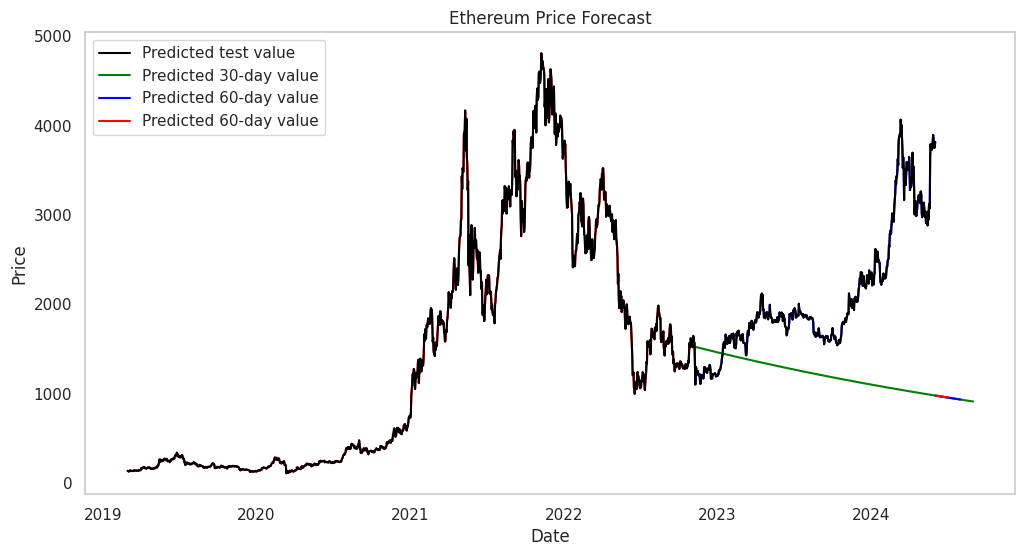

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(train, color = "red")
plt.plot(test, color = "blue")
plt.plot(predictions, color = "green")

# title and axis captions
plt.title("Train set, ")
plt.ylabel("Price")
plt.xlabel('Years')


plt.plot(eth_df['Price'], color = 'black', label='Predicted test value')
plt.plot(forecast_90, color = 'green', label='Predicted 30-day value')
plt.plot(forecast_60, color = 'blue', label='Predicted 60-day value')
plt.plot(forecast_30, color = 'red', label='Predicted 60-day value')

# title and axis captions
plt.title("Ethereum Price Forecast")
plt.ylabel("Price")
plt.xlabel('Date')

# add a legend
plt.legend()

# add a grid
plt.grid()

# display the plot
plt.show()


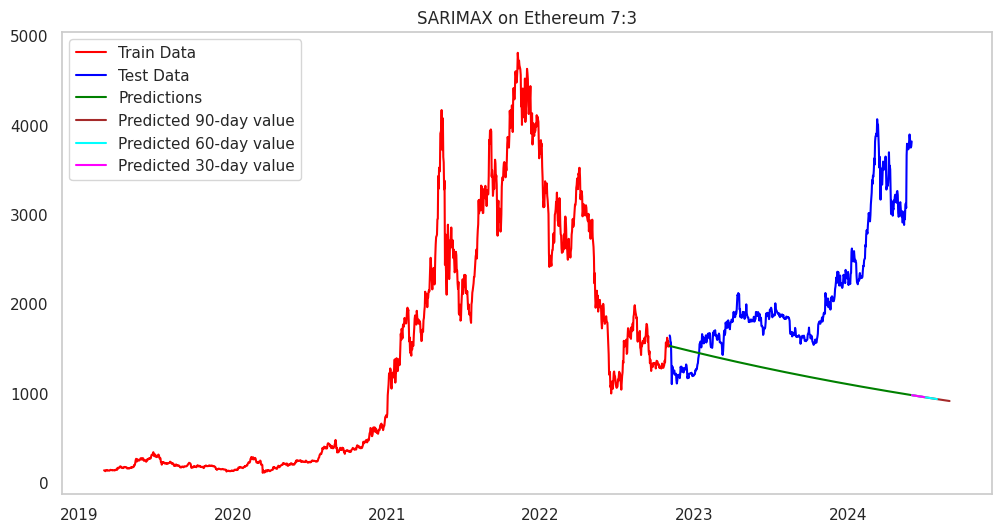

In [ ]:
plt.figure(figsize=(12, 6))

# Vẽ dữ liệu train, test và predictions
plt.plot(train, color = "red", label='Train Data')
plt.plot(test, color = "blue", label='Test Data')
plt.plot(predictions, color = "green", label='Predictions')

# Vẽ dữ liệu giá Ethereum và các dự báo
#plt.plot(eth_df['Price'], color = 'black', label='Actual Price')
plt.plot(forecast_90, color = 'brown', label='Predicted 90-day value')
plt.plot(forecast_60, color = 'cyan', label='Predicted 60-day value')
plt.plot(forecast_30, color = 'magenta', label='Predicted 30-day value')

# Thiết lập tiêu đề và nhãn cho trục
plt.title("SARIMAX on Ethereum 7:3")
#plt.ylabel("Price")
#plt.xlabel('Date')

# Thêm chú giải
plt.legend()

# Thêm lưới
plt.grid()

# Hiển thị biểu đồ
plt.show()


###Split data 8:2



In [ ]:
window_size = 10
feature_dim = 5

train_size = 0.8
test_size = 0.2

# model params
lstm_neurons = 20
rnn_neurons = 20
epochs = 100
batch_size = 4
loss = 'mae'
dropout = 0.25
optimizer = 'adam'

In [ ]:
train_index = int(len(eth_df)*train_size)
train_index

In [ ]:
eth_df_train = eth_df.iloc[:train_index]
eth_df_test  = eth_df[train_index:]

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(eth_df_train).index.to_list(), pd.DataFrame(eth_df_train['Price']), color='red', label='Train')
plt.plot(pd.DataFrame(eth_df_test).index.to_list(),pd.DataFrame(eth_df_test['Price']),color='blue' ,label ='Test')
plt.legend()
plt.show()

In [ ]:
eth_df['Price_diff'] = eth_df['Price'].diff(periods=7)
eth_df.info()

In [ ]:
eth_df

In [ ]:
eth_df['Price_diff'].fillna(method='backfill', inplace=True)

In [ ]:
result = seasonal_decompose(eth_df['Price'], model='multiplicative', period=7)
trend = result.trend.dropna()
seasonal = result.seasonal.dropna()
residual = result.resid.dropna()

# Plot the decomposed components
plt.figure(figsize=(6,6))

plt.subplot(4, 1, 1)
plt.plot(eth_df['Price'], label='Original Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()
# for fun i guess

In [ ]:
eth_df['month_index'] = eth_df.index.month
eth_df

In [ ]:
df_monthly = eth_df.resample('M').mean()
df_monthly

In [ ]:
df_monthly['Price'].plot()

In [ ]:
decompose = seasonal_decompose(df_monthly['Price'])
decompose.plot()

plt.show()

In [ ]:
#import pmdarima as pm
#model = pm.auto_arima(df_monthly['Price'], trace = True,start_P=0, seasonal=True,exogenous=eth_df['month_index'],
					#	d=None, D=1,m=12,
				#		error_action='ignore',
					#	suppress_warnings=True,
				#		stepwise=True)

In [ ]:
import pmdarima as pm
model = pm.auto_arima(eth_df['Price'], trace = True,start_P=0, seasonal=True,exogenous=eth_df['month_index'],
						d=None, D=1,m=7,max_p=3, max_d=2, max_q=3,
						error_action='ignore',
						suppress_warnings=True,
						stepwise=True)

In [ ]:
train = eth_df_train['Price']
test = eth_df_test['Price']
start = len(train)
end = len(train) +len(test) -1
model_sarimax = sm.tsa.statespace.SARIMAX(eth_df['Price'],
                                          order = (3,0,0),
                                          seasonal_order = (2,1,0,7))
result = model_sarimax.fit()

In [ ]:
result.summary()

In [ ]:
predictions = result.predict(start, end)
predictions

In [ ]:
plt.plot(train, color = "red")
plt.plot(test, color = "blue")
plt.plot(predictions, color = "green")

# title and axis captions
plt.title("Train set, ")
plt.ylabel("Price")
plt.xlabel('Years')

# add a grid
plt.grid()

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error


print('MAPE = ', mean_absolute_percentage_error(test, predictions))
print('MAE = ', mean_absolute_error(test, predictions))
print('RMSE = ', np.sqrt(mean_squared_error(test, predictions)))

In [ ]:
start = len(eth_df)

end = (len(eth_df) - 1) + 30

forecast_30 = result.predict(start, end)

In [ ]:
start = len(eth_df)


end = (len(eth_df) - 1) + 60


forecast_60 = result.predict(start, end)

In [ ]:
start = len(eth_df)


end = (len(eth_df) - 1) + 90


forecast_90 = result.predict(start, end)

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(eth_df['Price'], color = 'black')
plt.plot(forecast_30, color = 'green')

# title and axis captions
plt.title("Close price ")
plt.ylabel("Close price ")
plt.xlabel('Years')

# add a grid
plt.grid()

plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(eth_df['Price'], color = 'black')
plt.plot(forecast_90, color = 'green')

# title and axis captions
#plt.title("Close price ")
#plt.ylabel("Close price ")
#plt.xlabel('Years')

# add a grid
plt.title("SARIMAX on Ethereum")
plt.grid()

plt.show()

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(train, color = "red")
plt.plot(test, color = "blue")
plt.plot(predictions, color = "green")

# title and axis captions
plt.title("Train set, ")
plt.ylabel("Price")
plt.xlabel('Years')


plt.plot(eth_df['Price'], color = 'black', label='Predicted test value')
plt.plot(forecast_90, color = 'green', label='Predicted 30-day value')
plt.plot(forecast_60, color = 'blue', label='Predicted 60-day value')
plt.plot(forecast_30, color = 'red', label='Predicted 60-day value')

# title and axis captions
plt.title("Ethereum Price Forecast")
plt.ylabel("Price")
plt.xlabel('Date')

# add a legend
plt.legend()

# add a grid
plt.grid()

# display the plot
plt.show()


In [ ]:
plt.figure(figsize=(12, 6))

# Vẽ dữ liệu train, test và predictions
plt.plot(train, color = "red", label='Train Data')
plt.plot(test, color = "blue", label='Test Data')
plt.plot(predictions, color = "green", label='Predictions')

# Vẽ dữ liệu giá Ethereum và các dự báo
#plt.plot(eth_df['Price'], color = 'black', label='Actual Price')
plt.plot(forecast_90, color = 'brown', label='Predicted 90-day value')
plt.plot(forecast_60, color = 'cyan', label='Predicted 60-day value')
plt.plot(forecast_30, color = 'magenta', label='Predicted 30-day value')

# Thiết lập tiêu đề và nhãn cho trục
plt.title("SARIMAX on Ethereum 8:2")
#plt.ylabel("Price")
#plt.xlabel('Date')

# Thêm chú giải
plt.legend()

# Thêm lưới
plt.grid()

# Hiển thị biểu đồ
plt.show()


In [ ]:
eth_df

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-01,135.72,135.47,138.06,128.46,9730000.0,0.0018,-1.87,3
2019-03-02,132.76,135.72,136.36,130.74,11290000.0,-0.0218,-1.87,3
2019-03-03,131.01,132.77,168.42,129.05,10640000.0,-0.0132,-1.87,3
2019-03-04,125.97,131.02,131.57,123.25,14110000.0,-0.0385,-1.87,3
2019-03-05,136.82,125.97,141.11,125.44,16740000.0,0.0861,-1.87,3
...,...,...,...,...,...,...,...,...
2024-05-28,3845.56,3894.33,3929.21,3775.08,436240.0,-0.0125,55.10,5
2024-05-29,3769.57,3845.56,3886.44,3745.72,353250.0,-0.0198,30.49,5
2024-05-30,3747.55,3767.22,3824.94,3703.74,293810.0,-0.0058,-38.10,5


###Split data with ratio 6:4